In [1]:
import numpy as np
import cv2
import glob
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def calibrateImages(img, objpoints, imgpoints):
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    return cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    

In [3]:
def undistortImage(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx) 
    


In [4]:


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
calib_images=[]
# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    calib_images.append(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        #cv2.imshow('Undistorted Image', undistorted)

#gray_calib = cv2.cvtColor(calib_images[0],cv2.COLOR_BGR2GRAY)      
ret, mtx, dist, rvecs, tvecs = calibrateImages(calib_images[0], objpoints, imgpoints)


In [5]:
def plotoriginal_vs_processed(originalImage,OriginalImageName, processedImage, processedImageName):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    #cv2.polylines(originalImage,pts, True,(0,255,0),3)
    #cv2.polylines(originalImage,pts2, True,(255,0,0),3)
    ax1.imshow(originalImage)
    ax1.set_title(OriginalImageName, fontsize=12)
    ax2.imshow(processedImage)
    ax2.set_title(processedImageName, fontsize=12)
   

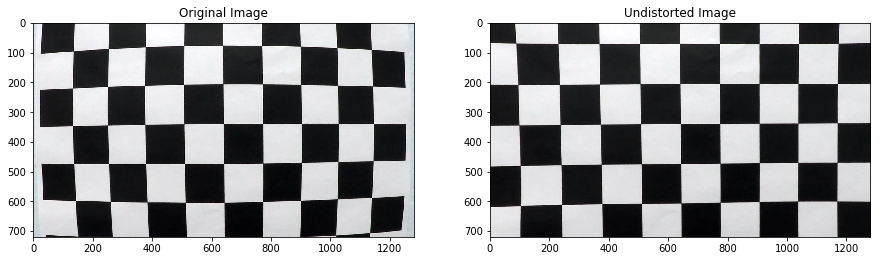

In [6]:
dst = undistortImage(calib_images[0], mtx, dist)  
plotoriginal_vs_processed(calib_images[0], 'Original Image',dst,'Undistorted Image')

In [7]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    abs_sobel = None
    if(orient=='x'):
        abs_sobel=np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel))
    elif(orient=='y'):
        abs_sobel=np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel))
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel=np.uint8((255.0*abs_sobel)/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    # is > thresh_min and < thresh_max
    #print(np.max(scaled_sobel))
    #print(np.max(abs_sobel))
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <=thresh[1])]=1
    
    #print(binary_output)
    # Apply threshold
    return binary_output

#Calculating magnitude and direction binary
# def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
#     gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#     # 2) Take the gradient in x and y separately
#     abs_sobel_x=np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
#     abs_sobel_y=np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
#     # 3) Calculate the magnitude 
#     magnitude=np.sqrt(np.square(abs_sobel_x)+np.square(abs_sobel_y))
#     # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
#     scaled_image=np.uint8(255*magnitude/np.max(magnitude))
#     # 5) Create a binary mask where mag thresholds are met
#     binary_output=np.zeros_like(scaled_image)
#     binary_output[(scaled_image>=mag_thresh[0]) & (scaled_image<=mag_thresh[1])]=1
#     return binary_output
# 
# def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
#     # Calculate gradient direction
#     gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#     # 2) Take the gradient in x and y separately
#     abs_sobel_x=np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0,  ksize=sobel_kernel))
#     abs_sobel_y=np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1,  ksize=sobel_kernel))
# 
#     # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
#     absgraddir = np.arctan2(abs_sobel_y, abs_sobel_x)
#     # 5) Create a binary mask where mag thresholds are met
#     binary_output=np.zeros_like(absgraddir)
#     binary_output[(absgraddir>=thresh[0]) & (absgraddir<=thresh[1])]=1
#     # Apply threshold
#     return binary_output

def hls_select(img, sthresh=(0, 255), lthresh=(0,255)):
    # 1) Convert to HLS color space
    hls=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel=hls[:,:,2]
    l_channel=hls[:,:,1]
    # 2) Apply a threshold to the S channel
    sbinary_output=np.zeros_like(s_channel)
    # 3) Return a binary image of threshold result
    sbinary_output[(s_channel>sthresh[0]) & (s_channel<=sthresh[1])]=1
    lbinary_output=np.zeros_like(l_channel)
    lbinary_output[(l_channel>lthresh[0]) & (l_channel<=lthresh[1])]=1
    #binary_output = np.copy(img) # placeholder line
    return sbinary_output, lbinary_output

def r_binary(img, thresh=(0,255)):
    R = img[:,:,0]
    R_binary=np.zeros_like(R)
    R_binary[(R>=thresh[0]) & (R<=thresh[1])]=1
    return R_binary

In [8]:
def perspectiveTransform(image):
    #src = np.array([[[225, 700], [600,450], [680,450], [1075,700]]])
    #dst= np.array([[[350,700], [350, 0], [900,0], [900,700]]])
    src = np.float32([[230, 693], [592,450], [687,450], [1076,693]])
    dst= np.float32([[350,700], [350, 0], [900,0], [900,700]])
    M = cv2.getPerspectiveTransform(src, dst)
    Min=cv2.getPerspectiveTransform(dst,src)
    img_size = (image.shape[1], image.shape[0])
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(image, M, img_size)
    return warped, M, Min

In [9]:
def regionOfInterest(image, vertices):
    
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image
    #print(vertices)
    
    #plt.imshow(roiImage, cmap='gray')

In [10]:
def findLines(image):
    histogram = np.sum( image[image.shape[0]//2:,:], axis=0)
    #plt.imshow(warped_single_channel,cmap="gray")
    out_img = np.dstack((image, image, image))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    nwindows = 9
    # Set height of windows
    window_height = np.int(image.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = int(image.shape[0] - (window+1)*window_height)
        win_y_high = int(image.shape[0] - window*window_height)
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 5) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 5) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    # out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    # plt.imshow(out_img)
    # plt.plot(left_fitx, ploty, color='yellow')
    # plt.plot(right_fitx, ploty, color='yellow')
    # plt.xlim(0, 1280)
    # plt.ylim(720, 0)
    #print(lefty.shape)
    #print(leftx.shape)
    # findcurvature(ploty, left_fit, right_fit )
    return ploty, left_fit, right_fit, leftx, rightx,lefty, righty, left_fitx, right_fitx
    

In [11]:
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

In [12]:
def findcurvature(ploty, left_fit, right_fit,leftx, rightx, lefty, righty):
    y_eval = np.max(ploty)
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    average_radius_of_curvature=left_curverad+right_curverad/2
    return  average_radius_of_curvature

In [13]:
def findVehicleDistanceFromLaneCenter(image, left_fit, right_fit):
    car_center=image.shape[1]/2
    image_height = image.shape[0] - 1
    left_line = left_fit[0]*(image_height**2) + left_fit[1]*image_height + left_fit[2]
    right_line = right_fit[0]*(image_height**2) + right_fit[1]*image_height + right_fit[2]
    offset = (left_line + right_line)/2 - car_center
    offset *= xm_per_pix  
    return offset
    

In [14]:
def plotLane(image,undistorted, warped,Min, left_fitx, right_fitx, yplot):
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, yplot]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, yplot])))])
    pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Min, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
    result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
    #plt.imshow(result)
    return result


In [15]:
bottom_left_vertex=(120,720)
top_left_vertex=(500,430)
top_right_vertex=(730,430)
bottom_right_vertex=(1200,720)
vertices=np.array([[bottom_left_vertex, top_left_vertex, top_right_vertex, bottom_right_vertex]])
undistorted_output_path="./output_images/undistorted_test_images/"
color_gradient_output_path="./output_images/color_gradient_images/"
warped_binary_output_path="./output_images/warped_images/"
final_result_path="./output_images/final_result_images/"

    
    

In [16]:
def pipeline(image):
    undistorted=undistortImage(image, mtx, dist)
    gradx = abs_sobel_thresh(undistorted, orient='x', sobel_kernel=7, thresh=(10, 190))
    # grady = abs_sobel_thresh(undistorted, orient='y', sobel_kernel=3, thresh=(20, 180))
    # mag_binary = mag_thresh(undistorted, sobel_kernel=7, mag_thresh=(110, 180))
    # dir_binary = dir_threshold(undistorted, sobel_kernel=5, thresh=(0.7, 1.2))
    s_binary, l_binary=hls_select(undistorted, sthresh=(150,255),lthresh=(120,255))
    
    R_binary=r_binary(undistorted,thresh=(200,255))
    combined = np.zeros_like(R_binary)
    
    combined[(((s_binary == 1) & (gradx == 1)) | ((gradx == 1) & (R_binary == 1))
                     | ((s_binary == 1) & (R_binary == 1))) & (l_binary==1)] = 1
    color_gradient_result=np.dstack(( combined, combined, combined))*255 
    masked_image=regionOfInterest(color_gradient_result, vertices)
    
    warped_binary, M, Min  = perspectiveTransform(masked_image)
    warped_single_channel = warped_binary[:,:,0]
    yplot, left_fit, right_fit,leftx, rightx, lefty , righty, left_fitx, right_fitx=findLines(warped_single_channel)
    radius_of_curvature=findcurvature(yplot, left_fit, right_fit,leftx, rightx,lefty ,righty )

    offset=findVehicleDistanceFromLaneCenter(warped_single_channel, left_fit, right_fit )


    result=plotLane(BGRtoRGB,undistorted, warped_single_channel,Min, left_fitx, right_fitx, yplot)
    font = cv2.FONT_ITALIC
    if(offset>0):
        cv2.putText(result, "Offset: "+str(round(np.absolute(offset),2)) +" meters to the left of the lane center" , (15,75), font, 1,(255,255,255),2)
    else:
        cv2.putText(result, "Offset: "+str(round(np.absolute(offset),2)) +" meters to the right of the lane center" , (15,75), font, 1,(255,255,255),2)
    cv2.putText(result, "Radius of curvature:" +str(round(radius_of_curvature))+ " meters", (15,150), font, 1,(255,255,255),2)
    return result
    


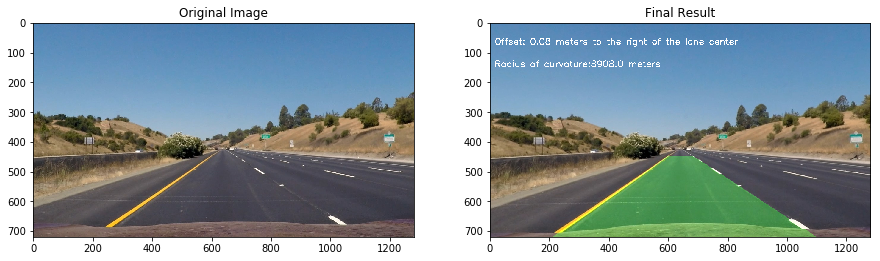

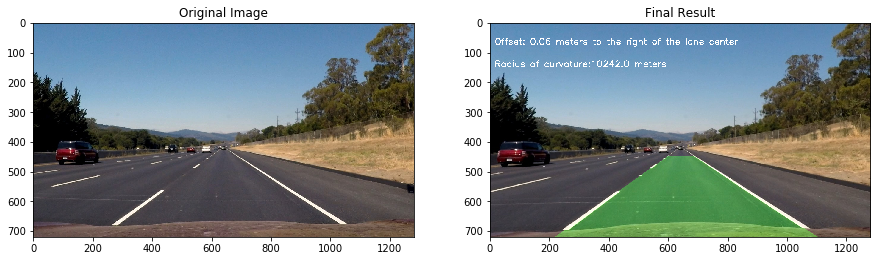

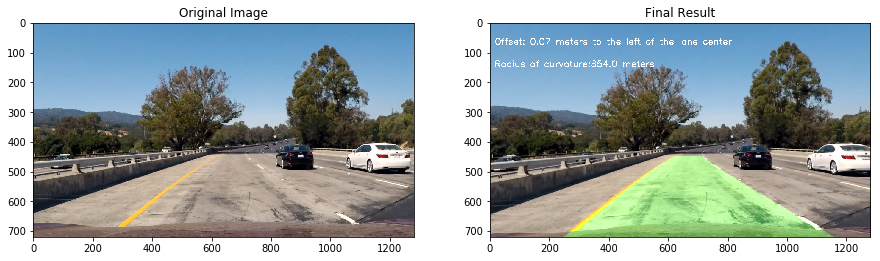

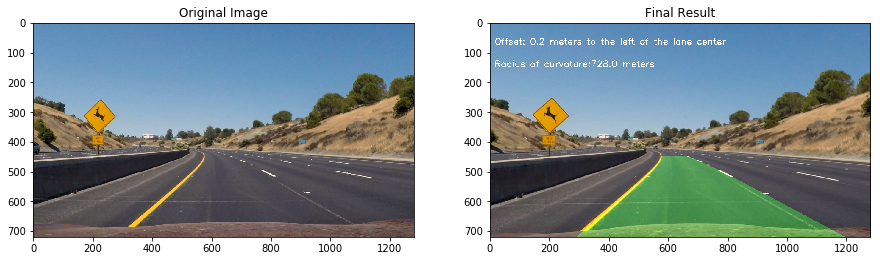

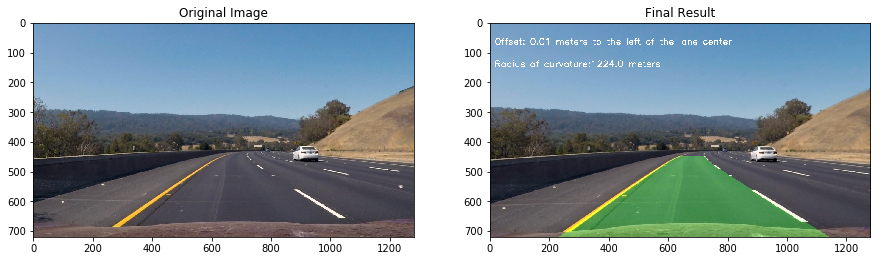

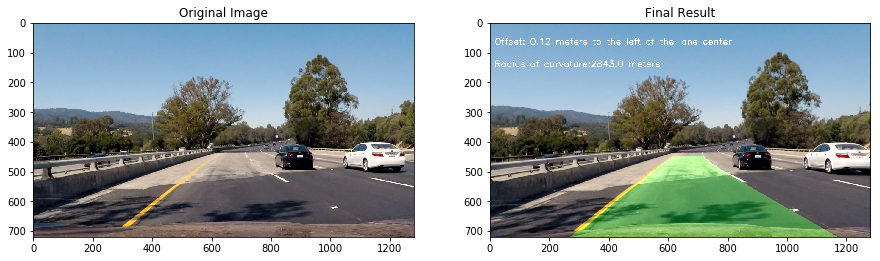

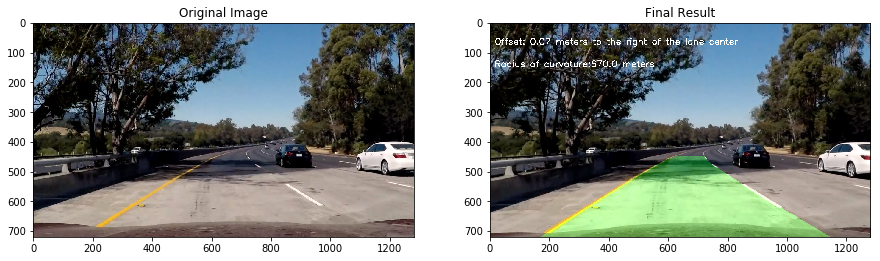

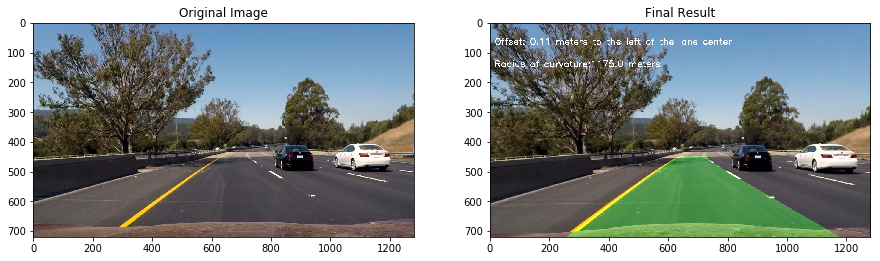

In [17]:
test_images_path="./test_images/"
file_names = listdir(test_images_path)
rows = len(file_names)
for name in file_names:
    test_image = cv2.imread(test_images_path+name)
    BGRtoRGB = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    result=pipeline(BGRtoRGB)
    plotoriginal_vs_processed(BGRtoRGB, "Original Image", result, "Final Result")
    #cv2.imwrite(color_gradient_output_path+"LBinary_images/"+name,result)

In [18]:
from moviepy.editor import VideoFileClip
vid_output = 'final_video_output.mp4'

# The file referenced in clip1 is the original video before anything has been done to it
#clip1 = VideoFileClip("project_video.mp4").subclip('00:00:20.00','00:00:25.00') 
clip1 = VideoFileClip("project_video.mp4")

# NOTE: this function expects color images
vid_clip = clip1.fl_image(pipeline)
vid_clip.write_videofile(vid_output, audio=False)

[MoviePy] >>>> Building video final_video_output1.mp4


[MoviePy] Writing video final_video_output1.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

  0%|                                                                                 | 1/1261 [00:00<04:28,  4.69it/s]

  0%|▏                                                                                | 2/1261 [00:00<04:02,  5.19it/s]

  0%|▏                                                                                | 3/1261 [00:00<03:47,  5.53it/s]

  0%|▎                                                                                | 4/1261 [00:00<03:36,  5.80it/s]

  0%|▎                                                                                | 5/1261 [00:00<03:26,  6.08it/s]

  0%|▍                                                                                | 6/1261 [00:00<03:22,  6.18it/s]

  1%|▍                                                                                | 7/1261 [00:01<03:18,  6.32it/s]

  1%|▌                                                                                | 8/1261 [00:01<03:15,  6.39it/s]

  1%|▌                                                                                | 9/1261 [00:01<03:18,  6.31it/s]

  1%|▋                                                                               | 10/1261 [00:01<03:18,  6.29it/s]

  1%|▋                                                                               | 11/1261 [00:01<03:15,  6.39it/s]

  1%|▊                                                                               | 12/1261 [00:01<03:12,  6.48it/s]

  1%|▊                                                                               | 13/1261 [00:02<03:13,  6.44it/s]

  1%|▉                                                                               | 14/1261 [00:02<03:10,  6.55it/s]

  1%|▉                                                                               | 15/1261 [00:02<03:08,  6.61it/s]

  1%|█                                                                               | 16/1261 [00:02<03:07,  6.64it/s]

  1%|█                                                                               | 17/1261 [00:02<03:06,  6.66it/s]

  1%|█▏                                                                              | 18/1261 [00:02<03:09,  6.55it/s]

  2%|█▏                                                                              | 19/1261 [00:02<03:08,  6.60it/s]

  2%|█▎                                                                              | 20/1261 [00:03<03:13,  6.41it/s]

  2%|█▎                                                                              | 21/1261 [00:03<03:10,  6.50it/s]

  2%|█▍                                                                              | 22/1261 [00:03<03:08,  6.56it/s]

  2%|█▍                                                                              | 23/1261 [00:03<03:06,  6.63it/s]

  2%|█▌                                                                              | 24/1261 [00:03<03:05,  6.67it/s]

  2%|█▌                                                                              | 25/1261 [00:03<03:09,  6.53it/s]

  2%|█▋                                                                              | 26/1261 [00:04<03:07,  6.58it/s]

  2%|█▋                                                                              | 27/1261 [00:04<03:14,  6.36it/s]

  2%|█▊                                                                              | 28/1261 [00:04<03:11,  6.44it/s]

  2%|█▊                                                                              | 29/1261 [00:04<03:09,  6.50it/s]

  2%|█▉                                                                              | 30/1261 [00:04<03:07,  6.56it/s]

  2%|█▉                                                                              | 31/1261 [00:04<03:28,  5.89it/s]

  3%|██                                                                              | 32/1261 [00:05<03:41,  5.54it/s]

  3%|██                                                                              | 33/1261 [00:05<03:34,  5.73it/s]

  3%|██▏                                                                             | 34/1261 [00:05<03:24,  6.01it/s]

  3%|██▏                                                                             | 35/1261 [00:05<03:16,  6.23it/s]

  3%|██▎                                                                             | 36/1261 [00:05<03:11,  6.39it/s]

  3%|██▎                                                                             | 37/1261 [00:05<03:08,  6.49it/s]

  3%|██▍                                                                             | 38/1261 [00:05<03:05,  6.58it/s]

  3%|██▍                                                                             | 39/1261 [00:06<03:09,  6.44it/s]

  3%|██▌                                                                             | 40/1261 [00:06<03:14,  6.28it/s]

  3%|██▌                                                                             | 41/1261 [00:06<03:10,  6.42it/s]

  3%|██▋                                                                             | 42/1261 [00:06<03:07,  6.51it/s]

  3%|██▋                                                                             | 43/1261 [00:06<03:16,  6.20it/s]

  3%|██▊                                                                             | 44/1261 [00:06<03:11,  6.37it/s]

  4%|██▊                                                                             | 45/1261 [00:07<03:14,  6.26it/s]

  4%|██▉                                                                             | 46/1261 [00:07<03:12,  6.30it/s]

  4%|██▉                                                                             | 47/1261 [00:07<03:10,  6.37it/s]

  4%|███                                                                             | 48/1261 [00:07<03:11,  6.34it/s]

  4%|███                                                                             | 49/1261 [00:07<03:09,  6.40it/s]

  4%|███▏                                                                            | 50/1261 [00:07<03:09,  6.39it/s]

  4%|███▏                                                                            | 51/1261 [00:07<03:06,  6.48it/s]

  4%|███▎                                                                            | 52/1261 [00:08<03:11,  6.32it/s]

  4%|███▎                                                                            | 53/1261 [00:08<03:12,  6.28it/s]

  4%|███▍                                                                            | 54/1261 [00:08<03:12,  6.28it/s]

  4%|███▍                                                                            | 55/1261 [00:08<03:11,  6.30it/s]

  4%|███▌                                                                            | 56/1261 [00:08<03:08,  6.40it/s]

  5%|███▌                                                                            | 57/1261 [00:08<03:06,  6.47it/s]

  5%|███▋                                                                            | 58/1261 [00:09<03:09,  6.35it/s]

  5%|███▋                                                                            | 59/1261 [00:09<03:11,  6.27it/s]

  5%|███▊                                                                            | 60/1261 [00:09<03:12,  6.25it/s]

  5%|███▊                                                                            | 61/1261 [00:09<03:12,  6.24it/s]

  5%|███▉                                                                            | 62/1261 [00:09<03:11,  6.28it/s]

  5%|███▉                                                                            | 63/1261 [00:09<03:07,  6.38it/s]

  5%|████                                                                            | 64/1261 [00:10<03:06,  6.41it/s]

  5%|████                                                                            | 65/1261 [00:10<03:05,  6.46it/s]

  5%|████▏                                                                           | 66/1261 [00:10<03:08,  6.33it/s]

  5%|████▎                                                                           | 67/1261 [00:10<03:15,  6.10it/s]

  5%|████▎                                                                           | 68/1261 [00:10<03:11,  6.22it/s]

  5%|████▍                                                                           | 69/1261 [00:10<03:10,  6.25it/s]

  6%|████▍                                                                           | 70/1261 [00:11<03:07,  6.35it/s]

  6%|████▌                                                                           | 71/1261 [00:11<03:07,  6.35it/s]

  6%|████▌                                                                           | 72/1261 [00:11<03:06,  6.37it/s]

  6%|████▋                                                                           | 73/1261 [00:11<03:08,  6.31it/s]

  6%|████▋                                                                           | 74/1261 [00:11<03:14,  6.10it/s]

  6%|████▊                                                                           | 75/1261 [00:11<03:13,  6.13it/s]

  6%|████▊                                                                           | 76/1261 [00:11<03:08,  6.27it/s]

  6%|████▉                                                                           | 77/1261 [00:12<03:06,  6.35it/s]

  6%|████▉                                                                           | 78/1261 [00:12<03:05,  6.36it/s]

  6%|█████                                                                           | 79/1261 [00:12<03:07,  6.29it/s]

  6%|█████                                                                           | 80/1261 [00:12<03:05,  6.36it/s]

  6%|█████▏                                                                          | 81/1261 [00:12<03:07,  6.28it/s]

  7%|█████▏                                                                          | 82/1261 [00:12<03:07,  6.29it/s]

  7%|█████▎                                                                          | 83/1261 [00:13<03:06,  6.31it/s]

  7%|█████▎                                                                          | 84/1261 [00:13<03:04,  6.39it/s]

  7%|█████▍                                                                          | 85/1261 [00:13<03:04,  6.37it/s]

  7%|█████▍                                                                          | 86/1261 [00:13<03:07,  6.26it/s]

  7%|█████▌                                                                          | 87/1261 [00:13<03:06,  6.30it/s]

  7%|█████▌                                                                          | 88/1261 [00:13<03:07,  6.25it/s]

  7%|█████▋                                                                          | 89/1261 [00:14<03:07,  6.25it/s]

  7%|█████▋                                                                          | 90/1261 [00:14<03:05,  6.31it/s]

  7%|█████▊                                                                          | 91/1261 [00:14<03:04,  6.35it/s]

  7%|█████▊                                                                          | 92/1261 [00:14<03:01,  6.43it/s]

  7%|█████▉                                                                          | 93/1261 [00:14<03:05,  6.30it/s]

  7%|█████▉                                                                          | 94/1261 [00:14<03:03,  6.34it/s]

  8%|██████                                                                          | 95/1261 [00:14<03:03,  6.34it/s]

  8%|██████                                                                          | 96/1261 [00:15<03:04,  6.32it/s]

  8%|██████▏                                                                         | 97/1261 [00:15<03:06,  6.25it/s]

  8%|██████▏                                                                         | 98/1261 [00:15<03:05,  6.27it/s]

  8%|██████▎                                                                         | 99/1261 [00:15<03:03,  6.32it/s]

  8%|██████▎                                                                        | 100/1261 [00:15<03:04,  6.28it/s]

  8%|██████▎                                                                        | 101/1261 [00:15<03:06,  6.22it/s]

  8%|██████▍                                                                        | 102/1261 [00:16<03:05,  6.26it/s]

  8%|██████▍                                                                        | 103/1261 [00:16<03:05,  6.26it/s]

  8%|██████▌                                                                        | 104/1261 [00:16<03:01,  6.37it/s]

  8%|██████▌                                                                        | 105/1261 [00:16<03:00,  6.42it/s]

  8%|██████▋                                                                        | 106/1261 [00:16<02:58,  6.48it/s]

  8%|██████▋                                                                        | 107/1261 [00:16<03:00,  6.39it/s]

  9%|██████▊                                                                        | 108/1261 [00:17<03:01,  6.35it/s]

  9%|██████▊                                                                        | 109/1261 [00:17<03:03,  6.28it/s]

  9%|██████▉                                                                        | 110/1261 [00:17<03:02,  6.31it/s]

  9%|██████▉                                                                        | 111/1261 [00:17<02:59,  6.40it/s]

  9%|███████                                                                        | 112/1261 [00:17<02:57,  6.47it/s]

  9%|███████                                                                        | 113/1261 [00:17<02:58,  6.43it/s]

  9%|███████▏                                                                       | 114/1261 [00:17<02:59,  6.40it/s]

  9%|███████▏                                                                       | 115/1261 [00:18<03:01,  6.33it/s]

  9%|███████▎                                                                       | 116/1261 [00:18<03:00,  6.35it/s]

  9%|███████▎                                                                       | 117/1261 [00:18<03:01,  6.32it/s]

  9%|███████▍                                                                       | 118/1261 [00:18<02:58,  6.41it/s]

  9%|███████▍                                                                       | 119/1261 [00:18<02:58,  6.41it/s]

 10%|███████▌                                                                       | 120/1261 [00:18<03:04,  6.19it/s]

 10%|███████▌                                                                       | 121/1261 [00:19<03:00,  6.30it/s]

 10%|███████▋                                                                       | 122/1261 [00:19<03:02,  6.25it/s]

 10%|███████▋                                                                       | 123/1261 [00:19<03:02,  6.22it/s]

 10%|███████▊                                                                       | 124/1261 [00:19<02:59,  6.34it/s]

 10%|███████▊                                                                       | 125/1261 [00:19<02:56,  6.42it/s]

 10%|███████▉                                                                       | 126/1261 [00:19<02:56,  6.42it/s]

 10%|███████▉                                                                       | 127/1261 [00:20<03:01,  6.24it/s]

 10%|████████                                                                       | 128/1261 [00:20<03:00,  6.27it/s]

 10%|████████                                                                       | 129/1261 [00:20<03:03,  6.16it/s]

 10%|████████▏                                                                      | 130/1261 [00:20<03:04,  6.12it/s]

 10%|████████▏                                                                      | 131/1261 [00:20<03:01,  6.22it/s]

 10%|████████▎                                                                      | 132/1261 [00:20<02:59,  6.30it/s]

 11%|████████▎                                                                      | 133/1261 [00:20<02:56,  6.39it/s]

 11%|████████▍                                                                      | 134/1261 [00:21<02:59,  6.26it/s]

 11%|████████▍                                                                      | 135/1261 [00:21<02:59,  6.26it/s]

 11%|████████▌                                                                      | 136/1261 [00:21<02:59,  6.25it/s]

 11%|████████▌                                                                      | 137/1261 [00:21<02:58,  6.29it/s]

 11%|████████▋                                                                      | 138/1261 [00:21<02:56,  6.35it/s]

 11%|████████▋                                                                      | 139/1261 [00:21<02:55,  6.40it/s]

 11%|████████▊                                                                      | 140/1261 [00:22<02:53,  6.46it/s]

 11%|████████▊                                                                      | 141/1261 [00:22<02:56,  6.36it/s]

 11%|████████▉                                                                      | 142/1261 [00:22<02:57,  6.29it/s]

 11%|████████▉                                                                      | 143/1261 [00:22<02:59,  6.24it/s]

 11%|█████████                                                                      | 144/1261 [00:22<02:59,  6.22it/s]

 11%|█████████                                                                      | 145/1261 [00:22<02:56,  6.31it/s]

 12%|█████████▏                                                                     | 146/1261 [00:23<02:54,  6.37it/s]

 12%|█████████▏                                                                     | 147/1261 [00:23<02:53,  6.41it/s]

 12%|█████████▎                                                                     | 148/1261 [00:23<02:56,  6.32it/s]

 12%|█████████▎                                                                     | 149/1261 [00:23<02:58,  6.22it/s]

 12%|█████████▍                                                                     | 150/1261 [00:23<02:59,  6.18it/s]

 12%|█████████▍                                                                     | 151/1261 [00:23<02:56,  6.29it/s]

 12%|█████████▌                                                                     | 152/1261 [00:24<02:54,  6.35it/s]

 12%|█████████▌                                                                     | 153/1261 [00:24<02:54,  6.37it/s]

 12%|█████████▋                                                                     | 154/1261 [00:24<02:52,  6.40it/s]

 12%|█████████▋                                                                     | 155/1261 [00:24<02:52,  6.40it/s]

 12%|█████████▊                                                                     | 156/1261 [00:24<03:03,  6.01it/s]

 12%|█████████▊                                                                     | 157/1261 [00:24<02:57,  6.20it/s]

 13%|█████████▉                                                                     | 158/1261 [00:24<02:53,  6.36it/s]

 13%|█████████▉                                                                     | 159/1261 [00:25<02:51,  6.41it/s]

 13%|██████████                                                                     | 160/1261 [00:25<02:50,  6.46it/s]

 13%|██████████                                                                     | 161/1261 [00:25<02:52,  6.38it/s]

 13%|██████████▏                                                                    | 162/1261 [00:25<02:54,  6.32it/s]

 13%|██████████▏                                                                    | 163/1261 [00:25<03:03,  5.99it/s]

 13%|██████████▎                                                                    | 164/1261 [00:25<03:00,  6.06it/s]

 13%|██████████▎                                                                    | 165/1261 [00:26<02:59,  6.12it/s]

 13%|██████████▍                                                                    | 166/1261 [00:26<02:54,  6.27it/s]

 13%|██████████▍                                                                    | 167/1261 [00:26<02:52,  6.36it/s]

 13%|██████████▌                                                                    | 168/1261 [00:26<03:05,  5.90it/s]

 13%|██████████▌                                                                    | 169/1261 [00:26<03:13,  5.65it/s]

 13%|██████████▋                                                                    | 170/1261 [00:27<03:55,  4.62it/s]

 14%|██████████▋                                                                    | 171/1261 [00:27<03:34,  5.08it/s]

 14%|██████████▊                                                                    | 172/1261 [00:27<03:21,  5.41it/s]

 14%|██████████▊                                                                    | 173/1261 [00:27<03:10,  5.73it/s]

 14%|██████████▉                                                                    | 174/1261 [00:27<03:01,  5.99it/s]

 14%|██████████▉                                                                    | 175/1261 [00:27<03:00,  6.03it/s]

 14%|███████████                                                                    | 176/1261 [00:28<03:01,  5.97it/s]

 14%|███████████                                                                    | 177/1261 [00:28<03:01,  5.99it/s]

 14%|███████████▏                                                                   | 178/1261 [00:28<03:01,  5.95it/s]

 14%|███████████▏                                                                   | 179/1261 [00:28<03:24,  5.29it/s]

 14%|███████████▎                                                                   | 180/1261 [00:28<03:12,  5.63it/s]

 14%|███████████▎                                                                   | 181/1261 [00:28<03:08,  5.74it/s]

 14%|███████████▍                                                                   | 182/1261 [00:29<03:02,  5.90it/s]

 15%|███████████▍                                                                   | 183/1261 [00:29<02:58,  6.02it/s]

 15%|███████████▌                                                                   | 184/1261 [00:29<02:57,  6.08it/s]

 15%|███████████▌                                                                   | 185/1261 [00:29<02:52,  6.23it/s]

 15%|███████████▋                                                                   | 186/1261 [00:29<02:50,  6.31it/s]

 15%|███████████▋                                                                   | 187/1261 [00:29<02:48,  6.36it/s]

 15%|███████████▊                                                                   | 188/1261 [00:30<02:52,  6.23it/s]

 15%|███████████▊                                                                   | 189/1261 [00:30<02:50,  6.28it/s]

 15%|███████████▉                                                                   | 190/1261 [00:30<02:50,  6.28it/s]

 15%|███████████▉                                                                   | 191/1261 [00:30<02:49,  6.31it/s]

 15%|████████████                                                                   | 192/1261 [00:30<02:48,  6.35it/s]

 15%|████████████                                                                   | 193/1261 [00:30<02:45,  6.44it/s]

 15%|████████████▏                                                                  | 194/1261 [00:30<02:45,  6.44it/s]

 15%|████████████▏                                                                  | 195/1261 [00:31<02:47,  6.37it/s]

 16%|████████████▎                                                                  | 196/1261 [00:31<02:46,  6.39it/s]

 16%|████████████▎                                                                  | 197/1261 [00:31<02:47,  6.34it/s]

 16%|████████████▍                                                                  | 198/1261 [00:31<02:47,  6.33it/s]

 16%|████████████▍                                                                  | 199/1261 [00:31<02:47,  6.33it/s]

 16%|████████████▌                                                                  | 200/1261 [00:31<02:45,  6.43it/s]

 16%|████████████▌                                                                  | 201/1261 [00:32<02:44,  6.43it/s]

 16%|████████████▋                                                                  | 202/1261 [00:32<02:45,  6.40it/s]

 16%|████████████▋                                                                  | 203/1261 [00:32<02:48,  6.27it/s]

 16%|████████████▊                                                                  | 204/1261 [00:32<02:47,  6.31it/s]

 16%|████████████▊                                                                  | 205/1261 [00:32<02:47,  6.29it/s]

 16%|████████████▉                                                                  | 206/1261 [00:32<02:44,  6.42it/s]

 16%|████████████▉                                                                  | 207/1261 [00:33<02:42,  6.47it/s]

 16%|█████████████                                                                  | 208/1261 [00:33<02:40,  6.55it/s]

 17%|█████████████                                                                  | 209/1261 [00:33<02:43,  6.44it/s]

 17%|█████████████▏                                                                 | 210/1261 [00:33<02:43,  6.42it/s]

 17%|█████████████▏                                                                 | 211/1261 [00:33<02:45,  6.35it/s]

 17%|█████████████▎                                                                 | 212/1261 [00:33<02:45,  6.36it/s]

 17%|█████████████▎                                                                 | 213/1261 [00:33<02:44,  6.38it/s]

 17%|█████████████▍                                                                 | 214/1261 [00:34<02:42,  6.44it/s]

 17%|█████████████▍                                                                 | 215/1261 [00:34<02:41,  6.48it/s]

 17%|█████████████▌                                                                 | 216/1261 [00:34<02:42,  6.43it/s]

 17%|█████████████▌                                                                 | 217/1261 [00:34<02:45,  6.33it/s]

 17%|█████████████▋                                                                 | 218/1261 [00:34<02:44,  6.33it/s]

 17%|█████████████▋                                                                 | 219/1261 [00:34<02:44,  6.34it/s]

 17%|█████████████▊                                                                 | 220/1261 [00:35<02:42,  6.42it/s]

 18%|█████████████▊                                                                 | 221/1261 [00:35<02:41,  6.45it/s]

 18%|█████████████▉                                                                 | 222/1261 [00:35<02:40,  6.46it/s]

 18%|█████████████▉                                                                 | 223/1261 [00:35<02:43,  6.34it/s]

 18%|██████████████                                                                 | 224/1261 [00:35<02:48,  6.15it/s]

 18%|██████████████                                                                 | 225/1261 [00:35<02:48,  6.16it/s]

 18%|██████████████▏                                                                | 226/1261 [00:36<02:44,  6.31it/s]

 18%|██████████████▏                                                                | 227/1261 [00:36<02:41,  6.40it/s]

 18%|██████████████▎                                                                | 228/1261 [00:36<02:41,  6.40it/s]

 18%|██████████████▎                                                                | 229/1261 [00:36<02:44,  6.28it/s]

 18%|██████████████▍                                                                | 230/1261 [00:36<02:42,  6.35it/s]

 18%|██████████████▍                                                                | 231/1261 [00:36<02:46,  6.19it/s]

 18%|██████████████▌                                                                | 232/1261 [00:36<02:45,  6.22it/s]

 18%|██████████████▌                                                                | 233/1261 [00:37<02:43,  6.27it/s]

 19%|██████████████▋                                                                | 234/1261 [00:37<02:40,  6.41it/s]

 19%|██████████████▋                                                                | 235/1261 [00:37<02:40,  6.40it/s]

 19%|██████████████▊                                                                | 236/1261 [00:37<02:45,  6.19it/s]

 19%|██████████████▊                                                                | 237/1261 [00:37<02:44,  6.23it/s]

 19%|██████████████▉                                                                | 238/1261 [00:37<02:45,  6.20it/s]

 19%|██████████████▉                                                                | 239/1261 [00:38<02:45,  6.18it/s]

 19%|███████████████                                                                | 240/1261 [00:38<02:45,  6.19it/s]

 19%|███████████████                                                                | 241/1261 [00:38<02:41,  6.33it/s]

 19%|███████████████▏                                                               | 242/1261 [00:38<02:39,  6.40it/s]

 19%|███████████████▏                                                               | 243/1261 [00:38<02:41,  6.30it/s]

 19%|███████████████▎                                                               | 244/1261 [00:38<02:41,  6.29it/s]

 19%|███████████████▎                                                               | 245/1261 [00:39<02:41,  6.29it/s]

 20%|███████████████▍                                                               | 246/1261 [00:39<02:40,  6.32it/s]

 20%|███████████████▍                                                               | 247/1261 [00:39<02:38,  6.41it/s]

 20%|███████████████▌                                                               | 248/1261 [00:39<02:36,  6.48it/s]

 20%|███████████████▌                                                               | 249/1261 [00:39<02:36,  6.45it/s]

 20%|███████████████▋                                                               | 250/1261 [00:39<02:38,  6.40it/s]

 20%|███████████████▋                                                               | 251/1261 [00:39<02:39,  6.34it/s]

 20%|███████████████▊                                                               | 252/1261 [00:40<02:39,  6.33it/s]

 20%|███████████████▊                                                               | 253/1261 [00:40<02:37,  6.38it/s]

 20%|███████████████▉                                                               | 254/1261 [00:40<02:36,  6.44it/s]

 20%|███████████████▉                                                               | 255/1261 [00:40<02:33,  6.54it/s]

 20%|████████████████                                                               | 256/1261 [00:40<02:39,  6.29it/s]

 20%|████████████████                                                               | 257/1261 [00:40<02:52,  5.82it/s]

 20%|████████████████▏                                                              | 258/1261 [00:41<03:28,  4.80it/s]

 21%|████████████████▏                                                              | 259/1261 [00:41<03:09,  5.28it/s]

 21%|████████████████▎                                                              | 260/1261 [00:41<02:58,  5.59it/s]

 21%|████████████████▎                                                              | 261/1261 [00:41<02:49,  5.91it/s]

 21%|████████████████▍                                                              | 262/1261 [00:41<02:44,  6.08it/s]

 21%|████████████████▍                                                              | 263/1261 [00:42<02:44,  6.06it/s]

 21%|████████████████▌                                                              | 264/1261 [00:42<02:48,  5.92it/s]

 21%|████████████████▌                                                              | 265/1261 [00:42<02:46,  5.97it/s]

 21%|████████████████▋                                                              | 266/1261 [00:42<02:41,  6.15it/s]

 21%|████████████████▋                                                              | 267/1261 [00:42<02:36,  6.33it/s]

 21%|████████████████▊                                                              | 268/1261 [00:42<02:35,  6.40it/s]

 21%|████████████████▊                                                              | 269/1261 [00:42<02:33,  6.47it/s]

 21%|████████████████▉                                                              | 270/1261 [00:43<02:37,  6.30it/s]

 21%|████████████████▉                                                              | 271/1261 [00:43<02:39,  6.19it/s]

 22%|█████████████████                                                              | 272/1261 [00:43<02:40,  6.17it/s]

 22%|█████████████████                                                              | 273/1261 [00:43<02:35,  6.35it/s]

 22%|█████████████████▏                                                             | 274/1261 [00:43<02:35,  6.34it/s]

 22%|█████████████████▏                                                             | 275/1261 [00:43<02:32,  6.45it/s]

 22%|█████████████████▎                                                             | 276/1261 [00:44<02:32,  6.46it/s]

 22%|█████████████████▎                                                             | 277/1261 [00:44<02:34,  6.37it/s]

 22%|█████████████████▍                                                             | 278/1261 [00:44<02:37,  6.25it/s]

 22%|█████████████████▍                                                             | 279/1261 [00:44<02:35,  6.31it/s]

 22%|█████████████████▌                                                             | 280/1261 [00:44<02:33,  6.41it/s]

 22%|█████████████████▌                                                             | 281/1261 [00:44<02:30,  6.52it/s]

 22%|█████████████████▋                                                             | 282/1261 [00:44<02:29,  6.56it/s]

 22%|█████████████████▋                                                             | 283/1261 [00:45<02:28,  6.59it/s]

 23%|█████████████████▊                                                             | 284/1261 [00:45<02:30,  6.47it/s]

 23%|█████████████████▊                                                             | 285/1261 [00:45<02:33,  6.35it/s]

 23%|█████████████████▉                                                             | 286/1261 [00:45<02:34,  6.31it/s]

 23%|█████████████████▉                                                             | 287/1261 [00:45<02:32,  6.39it/s]

 23%|██████████████████                                                             | 288/1261 [00:45<02:30,  6.48it/s]

 23%|██████████████████                                                             | 289/1261 [00:46<02:29,  6.52it/s]

 23%|██████████████████▏                                                            | 290/1261 [00:46<02:27,  6.56it/s]

 23%|██████████████████▏                                                            | 291/1261 [00:46<02:29,  6.50it/s]

 23%|██████████████████▎                                                            | 292/1261 [00:46<02:32,  6.37it/s]

 23%|██████████████████▎                                                            | 293/1261 [00:46<02:34,  6.27it/s]

 23%|██████████████████▍                                                            | 294/1261 [00:46<02:32,  6.33it/s]

 23%|██████████████████▍                                                            | 295/1261 [00:47<02:30,  6.41it/s]

 23%|██████████████████▌                                                            | 296/1261 [00:47<02:28,  6.48it/s]

 24%|██████████████████▌                                                            | 297/1261 [00:47<02:26,  6.58it/s]

 24%|██████████████████▋                                                            | 298/1261 [00:47<02:29,  6.42it/s]

 24%|██████████████████▋                                                            | 299/1261 [00:47<02:31,  6.37it/s]

 24%|██████████████████▊                                                            | 300/1261 [00:47<02:29,  6.44it/s]

 24%|██████████████████▊                                                            | 301/1261 [00:47<02:27,  6.52it/s]

 24%|██████████████████▉                                                            | 302/1261 [00:48<02:27,  6.51it/s]

 24%|██████████████████▉                                                            | 303/1261 [00:48<02:25,  6.59it/s]

 24%|███████████████████                                                            | 304/1261 [00:48<02:26,  6.55it/s]

 24%|███████████████████                                                            | 305/1261 [00:48<02:27,  6.49it/s]

 24%|███████████████████▏                                                           | 306/1261 [00:48<02:29,  6.38it/s]

 24%|███████████████████▏                                                           | 307/1261 [00:48<02:29,  6.40it/s]

 24%|███████████████████▎                                                           | 308/1261 [00:49<02:27,  6.45it/s]

 25%|███████████████████▎                                                           | 309/1261 [00:49<02:25,  6.54it/s]

 25%|███████████████████▍                                                           | 310/1261 [00:49<02:26,  6.51it/s]

 25%|███████████████████▍                                                           | 311/1261 [00:49<02:24,  6.57it/s]

 25%|███████████████████▌                                                           | 312/1261 [00:49<02:27,  6.44it/s]

 25%|███████████████████▌                                                           | 313/1261 [00:49<02:29,  6.35it/s]

 25%|███████████████████▋                                                           | 314/1261 [00:49<02:33,  6.15it/s]

 25%|███████████████████▋                                                           | 315/1261 [00:50<02:30,  6.27it/s]

 25%|███████████████████▊                                                           | 316/1261 [00:50<02:29,  6.34it/s]

 25%|███████████████████▊                                                           | 317/1261 [00:50<02:27,  6.41it/s]

 25%|███████████████████▉                                                           | 318/1261 [00:50<02:25,  6.47it/s]

 25%|███████████████████▉                                                           | 319/1261 [00:50<02:30,  6.27it/s]

 25%|████████████████████                                                           | 320/1261 [00:50<02:29,  6.30it/s]

 25%|████████████████████                                                           | 321/1261 [00:51<02:28,  6.32it/s]

 26%|████████████████████▏                                                          | 322/1261 [00:51<02:25,  6.45it/s]

 26%|████████████████████▏                                                          | 323/1261 [00:51<02:25,  6.46it/s]

 26%|████████████████████▎                                                          | 324/1261 [00:51<02:22,  6.56it/s]

 26%|████████████████████▎                                                          | 325/1261 [00:51<02:21,  6.62it/s]

 26%|████████████████████▍                                                          | 326/1261 [00:51<02:22,  6.54it/s]

 26%|████████████████████▍                                                          | 327/1261 [00:51<02:25,  6.44it/s]

 26%|████████████████████▌                                                          | 328/1261 [00:52<02:25,  6.43it/s]

 26%|████████████████████▌                                                          | 329/1261 [00:52<02:25,  6.42it/s]

 26%|████████████████████▋                                                          | 330/1261 [00:52<02:23,  6.50it/s]

 26%|████████████████████▋                                                          | 331/1261 [00:52<02:22,  6.54it/s]

 26%|████████████████████▊                                                          | 332/1261 [00:52<02:20,  6.61it/s]

 26%|████████████████████▊                                                          | 333/1261 [00:52<02:21,  6.54it/s]

 26%|████████████████████▉                                                          | 334/1261 [00:53<02:22,  6.48it/s]

 27%|████████████████████▉                                                          | 335/1261 [00:53<02:25,  6.36it/s]

 27%|█████████████████████                                                          | 336/1261 [00:53<02:24,  6.41it/s]

 27%|█████████████████████                                                          | 337/1261 [00:53<02:22,  6.47it/s]

 27%|█████████████████████▏                                                         | 338/1261 [00:53<02:21,  6.54it/s]

 27%|█████████████████████▏                                                         | 339/1261 [00:53<02:20,  6.58it/s]

 27%|█████████████████████▎                                                         | 340/1261 [00:53<02:21,  6.52it/s]

 27%|█████████████████████▎                                                         | 341/1261 [00:54<02:24,  6.38it/s]

 27%|█████████████████████▍                                                         | 342/1261 [00:54<02:23,  6.41it/s]

 27%|█████████████████████▍                                                         | 343/1261 [00:54<02:22,  6.42it/s]

 27%|█████████████████████▌                                                         | 344/1261 [00:54<02:20,  6.53it/s]

 27%|█████████████████████▌                                                         | 345/1261 [00:54<02:22,  6.44it/s]

 27%|█████████████████████▋                                                         | 346/1261 [00:54<02:20,  6.52it/s]

 28%|█████████████████████▋                                                         | 347/1261 [00:55<02:22,  6.42it/s]

 28%|█████████████████████▊                                                         | 348/1261 [00:55<02:23,  6.37it/s]

 28%|█████████████████████▊                                                         | 349/1261 [00:55<02:23,  6.34it/s]

 28%|█████████████████████▉                                                         | 350/1261 [00:55<02:22,  6.39it/s]

 28%|█████████████████████▉                                                         | 351/1261 [00:55<02:22,  6.39it/s]

 28%|██████████████████████                                                         | 352/1261 [00:55<02:20,  6.47it/s]

 28%|██████████████████████                                                         | 353/1261 [00:56<02:19,  6.51it/s]

 28%|██████████████████████▏                                                        | 354/1261 [00:56<02:25,  6.25it/s]

 28%|██████████████████████▏                                                        | 355/1261 [00:56<02:26,  6.19it/s]

 28%|██████████████████████▎                                                        | 356/1261 [00:56<02:22,  6.36it/s]

 28%|██████████████████████▎                                                        | 357/1261 [00:56<02:22,  6.34it/s]

 28%|██████████████████████▍                                                        | 358/1261 [00:56<02:20,  6.44it/s]

 28%|██████████████████████▍                                                        | 359/1261 [00:56<02:19,  6.46it/s]

 29%|██████████████████████▌                                                        | 360/1261 [00:57<02:18,  6.50it/s]

 29%|██████████████████████▌                                                        | 361/1261 [00:57<02:23,  6.27it/s]

 29%|██████████████████████▋                                                        | 362/1261 [00:57<02:24,  6.20it/s]

 29%|██████████████████████▋                                                        | 363/1261 [00:57<02:22,  6.31it/s]

 29%|██████████████████████▊                                                        | 364/1261 [00:57<02:19,  6.45it/s]

 29%|██████████████████████▊                                                        | 365/1261 [00:57<02:17,  6.50it/s]

 29%|██████████████████████▉                                                        | 366/1261 [00:58<02:15,  6.59it/s]

 29%|██████████████████████▉                                                        | 367/1261 [00:58<02:16,  6.57it/s]

 29%|███████████████████████                                                        | 368/1261 [00:58<02:21,  6.33it/s]

 29%|███████████████████████                                                        | 369/1261 [00:58<02:21,  6.29it/s]

 29%|███████████████████████▏                                                       | 370/1261 [00:58<02:20,  6.35it/s]

 29%|███████████████████████▏                                                       | 371/1261 [00:58<02:18,  6.42it/s]

 30%|███████████████████████▎                                                       | 372/1261 [00:58<02:16,  6.53it/s]

 30%|███████████████████████▎                                                       | 373/1261 [00:59<02:18,  6.43it/s]

 30%|███████████████████████▍                                                       | 374/1261 [00:59<02:16,  6.50it/s]

 30%|███████████████████████▍                                                       | 375/1261 [00:59<02:20,  6.31it/s]

 30%|███████████████████████▌                                                       | 376/1261 [00:59<02:20,  6.31it/s]

 30%|███████████████████████▌                                                       | 377/1261 [00:59<02:20,  6.31it/s]

 30%|███████████████████████▋                                                       | 378/1261 [00:59<02:19,  6.32it/s]

 30%|███████████████████████▋                                                       | 379/1261 [01:00<02:17,  6.41it/s]

 30%|███████████████████████▊                                                       | 380/1261 [01:00<02:16,  6.46it/s]

 30%|███████████████████████▊                                                       | 381/1261 [01:00<02:15,  6.50it/s]

 30%|███████████████████████▉                                                       | 382/1261 [01:00<02:19,  6.32it/s]

 30%|███████████████████████▉                                                       | 383/1261 [01:00<02:19,  6.29it/s]

 30%|████████████████████████                                                       | 384/1261 [01:00<02:18,  6.33it/s]

 31%|████████████████████████                                                       | 385/1261 [01:01<02:16,  6.41it/s]

 31%|████████████████████████▏                                                      | 386/1261 [01:01<02:15,  6.45it/s]

 31%|████████████████████████▏                                                      | 387/1261 [01:01<02:15,  6.47it/s]

 31%|████████████████████████▎                                                      | 388/1261 [01:01<02:14,  6.49it/s]

 31%|████████████████████████▎                                                      | 389/1261 [01:01<02:17,  6.35it/s]

 31%|████████████████████████▍                                                      | 390/1261 [01:01<02:18,  6.30it/s]

 31%|████████████████████████▍                                                      | 391/1261 [01:01<02:17,  6.34it/s]

 31%|████████████████████████▌                                                      | 392/1261 [01:02<02:16,  6.38it/s]

 31%|████████████████████████▌                                                      | 393/1261 [01:02<02:15,  6.40it/s]

 31%|████████████████████████▋                                                      | 394/1261 [01:02<02:12,  6.53it/s]

 31%|████████████████████████▋                                                      | 395/1261 [01:02<02:12,  6.52it/s]

 31%|████████████████████████▊                                                      | 396/1261 [01:02<02:16,  6.34it/s]

 31%|████████████████████████▊                                                      | 397/1261 [01:02<02:17,  6.30it/s]

 32%|████████████████████████▉                                                      | 398/1261 [01:03<02:15,  6.37it/s]

 32%|████████████████████████▉                                                      | 399/1261 [01:03<02:14,  6.40it/s]

 32%|█████████████████████████                                                      | 400/1261 [01:03<02:12,  6.48it/s]

 32%|█████████████████████████                                                      | 401/1261 [01:03<02:12,  6.48it/s]

 32%|█████████████████████████▏                                                     | 402/1261 [01:03<02:12,  6.50it/s]

 32%|█████████████████████████▏                                                     | 403/1261 [01:03<02:16,  6.30it/s]

 32%|█████████████████████████▎                                                     | 404/1261 [01:04<02:17,  6.25it/s]

 32%|█████████████████████████▎                                                     | 405/1261 [01:04<02:16,  6.27it/s]

 32%|█████████████████████████▍                                                     | 406/1261 [01:04<02:14,  6.37it/s]

 32%|█████████████████████████▍                                                     | 407/1261 [01:04<02:13,  6.42it/s]

 32%|█████████████████████████▌                                                     | 408/1261 [01:04<02:11,  6.46it/s]

 32%|█████████████████████████▌                                                     | 409/1261 [01:04<02:13,  6.38it/s]

 33%|█████████████████████████▋                                                     | 410/1261 [01:04<02:16,  6.25it/s]

 33%|█████████████████████████▋                                                     | 411/1261 [01:05<02:16,  6.21it/s]

 33%|█████████████████████████▊                                                     | 412/1261 [01:05<02:14,  6.29it/s]

 33%|█████████████████████████▊                                                     | 413/1261 [01:05<02:13,  6.37it/s]

 33%|█████████████████████████▉                                                     | 414/1261 [01:05<02:11,  6.46it/s]

 33%|█████████████████████████▉                                                     | 415/1261 [01:05<02:13,  6.32it/s]

 33%|██████████████████████████                                                     | 416/1261 [01:05<02:15,  6.23it/s]

 33%|██████████████████████████                                                     | 417/1261 [01:06<02:16,  6.16it/s]

 33%|██████████████████████████▏                                                    | 418/1261 [01:06<02:15,  6.23it/s]

 33%|██████████████████████████▏                                                    | 419/1261 [01:06<02:13,  6.30it/s]

 33%|██████████████████████████▎                                                    | 420/1261 [01:06<02:11,  6.38it/s]

 33%|██████████████████████████▍                                                    | 421/1261 [01:06<02:11,  6.40it/s]

 33%|██████████████████████████▍                                                    | 422/1261 [01:06<02:10,  6.45it/s]

 34%|██████████████████████████▌                                                    | 423/1261 [01:07<02:12,  6.31it/s]

 34%|██████████████████████████▌                                                    | 424/1261 [01:07<02:13,  6.27it/s]

 34%|██████████████████████████▋                                                    | 425/1261 [01:07<02:12,  6.32it/s]

 34%|██████████████████████████▋                                                    | 426/1261 [01:07<02:12,  6.30it/s]

 34%|██████████████████████████▊                                                    | 427/1261 [01:07<02:10,  6.40it/s]

 34%|██████████████████████████▊                                                    | 428/1261 [01:07<02:08,  6.48it/s]

 34%|██████████████████████████▉                                                    | 429/1261 [01:07<02:07,  6.55it/s]

 34%|██████████████████████████▉                                                    | 430/1261 [01:08<02:11,  6.31it/s]

 34%|███████████████████████████                                                    | 431/1261 [01:08<02:11,  6.34it/s]

 34%|███████████████████████████                                                    | 432/1261 [01:08<02:11,  6.28it/s]

 34%|███████████████████████████▏                                                   | 433/1261 [01:08<02:10,  6.36it/s]

 34%|███████████████████████████▏                                                   | 434/1261 [01:08<02:09,  6.38it/s]

 34%|███████████████████████████▎                                                   | 435/1261 [01:08<02:07,  6.50it/s]

 35%|███████████████████████████▎                                                   | 436/1261 [01:09<02:06,  6.52it/s]

 35%|███████████████████████████▍                                                   | 437/1261 [01:09<02:08,  6.43it/s]

 35%|███████████████████████████▍                                                   | 438/1261 [01:09<02:09,  6.35it/s]

 35%|███████████████████████████▌                                                   | 439/1261 [01:09<02:08,  6.41it/s]

 35%|███████████████████████████▌                                                   | 440/1261 [01:09<02:08,  6.39it/s]

 35%|███████████████████████████▋                                                   | 441/1261 [01:09<02:05,  6.52it/s]

 35%|███████████████████████████▋                                                   | 442/1261 [01:09<02:05,  6.55it/s]

 35%|███████████████████████████▊                                                   | 443/1261 [01:10<02:03,  6.61it/s]

 35%|███████████████████████████▊                                                   | 444/1261 [01:10<02:05,  6.52it/s]

 35%|███████████████████████████▉                                                   | 445/1261 [01:10<02:06,  6.44it/s]

 35%|███████████████████████████▉                                                   | 446/1261 [01:10<02:08,  6.36it/s]

 35%|████████████████████████████                                                   | 447/1261 [01:10<02:07,  6.38it/s]

 36%|████████████████████████████                                                   | 448/1261 [01:10<02:06,  6.41it/s]

 36%|████████████████████████████▏                                                  | 449/1261 [01:11<02:04,  6.51it/s]

 36%|████████████████████████████▏                                                  | 450/1261 [01:11<02:04,  6.49it/s]

 36%|████████████████████████████▎                                                  | 451/1261 [01:11<02:05,  6.44it/s]

 36%|████████████████████████████▎                                                  | 452/1261 [01:11<02:07,  6.33it/s]

 36%|████████████████████████████▍                                                  | 453/1261 [01:11<02:07,  6.35it/s]

 36%|████████████████████████████▍                                                  | 454/1261 [01:11<02:05,  6.42it/s]

 36%|████████████████████████████▌                                                  | 455/1261 [01:11<02:03,  6.51it/s]

 36%|████████████████████████████▌                                                  | 456/1261 [01:12<02:03,  6.52it/s]

 36%|████████████████████████████▋                                                  | 457/1261 [01:12<02:04,  6.47it/s]

 36%|████████████████████████████▋                                                  | 458/1261 [01:12<02:07,  6.29it/s]

 36%|████████████████████████████▊                                                  | 459/1261 [01:12<02:06,  6.33it/s]

 36%|████████████████████████████▊                                                  | 460/1261 [01:12<02:06,  6.31it/s]

 37%|████████████████████████████▉                                                  | 461/1261 [01:12<02:05,  6.39it/s]

 37%|████████████████████████████▉                                                  | 462/1261 [01:13<02:04,  6.39it/s]

 37%|█████████████████████████████                                                  | 463/1261 [01:13<02:02,  6.50it/s]

 37%|█████████████████████████████                                                  | 464/1261 [01:13<02:03,  6.47it/s]

 37%|█████████████████████████████▏                                                 | 465/1261 [01:13<02:03,  6.45it/s]

 37%|█████████████████████████████▏                                                 | 466/1261 [01:13<02:05,  6.33it/s]

 37%|█████████████████████████████▎                                                 | 467/1261 [01:13<02:05,  6.35it/s]

 37%|█████████████████████████████▎                                                 | 468/1261 [01:14<02:03,  6.42it/s]

 37%|█████████████████████████████▍                                                 | 469/1261 [01:14<02:02,  6.46it/s]

 37%|█████████████████████████████▍                                                 | 470/1261 [01:14<02:02,  6.48it/s]

 37%|█████████████████████████████▌                                                 | 471/1261 [01:14<02:01,  6.48it/s]

 37%|█████████████████████████████▌                                                 | 472/1261 [01:14<02:03,  6.37it/s]

 38%|█████████████████████████████▋                                                 | 473/1261 [01:14<02:05,  6.29it/s]

 38%|█████████████████████████████▋                                                 | 474/1261 [01:14<02:04,  6.35it/s]

 38%|█████████████████████████████▊                                                 | 475/1261 [01:15<02:04,  6.33it/s]

 38%|█████████████████████████████▊                                                 | 476/1261 [01:15<02:02,  6.40it/s]

 38%|█████████████████████████████▉                                                 | 477/1261 [01:15<02:00,  6.49it/s]

 38%|█████████████████████████████▉                                                 | 478/1261 [01:15<01:59,  6.53it/s]

 38%|██████████████████████████████                                                 | 479/1261 [01:15<02:02,  6.37it/s]

 38%|██████████████████████████████                                                 | 480/1261 [01:15<02:04,  6.27it/s]

 38%|██████████████████████████████▏                                                | 481/1261 [01:16<02:04,  6.27it/s]

 38%|██████████████████████████████▏                                                | 482/1261 [01:16<02:02,  6.37it/s]

 38%|██████████████████████████████▎                                                | 483/1261 [01:16<02:00,  6.47it/s]

 38%|██████████████████████████████▎                                                | 484/1261 [01:16<01:58,  6.54it/s]

 38%|██████████████████████████████▍                                                | 485/1261 [01:16<01:59,  6.50it/s]

 39%|██████████████████████████████▍                                                | 486/1261 [01:16<02:00,  6.45it/s]

 39%|██████████████████████████████▌                                                | 487/1261 [01:16<02:01,  6.35it/s]

 39%|██████████████████████████████▌                                                | 488/1261 [01:17<02:01,  6.38it/s]

 39%|██████████████████████████████▋                                                | 489/1261 [01:17<01:59,  6.45it/s]

 39%|██████████████████████████████▋                                                | 490/1261 [01:17<01:58,  6.51it/s]

 39%|██████████████████████████████▊                                                | 491/1261 [01:17<01:58,  6.49it/s]

 39%|██████████████████████████████▊                                                | 492/1261 [01:17<01:57,  6.53it/s]

 39%|██████████████████████████████▉                                                | 493/1261 [01:17<02:01,  6.33it/s]

 39%|██████████████████████████████▉                                                | 494/1261 [01:18<02:00,  6.34it/s]

 39%|███████████████████████████████                                                | 495/1261 [01:18<02:02,  6.28it/s]

 39%|███████████████████████████████                                                | 496/1261 [01:18<01:59,  6.41it/s]

 39%|███████████████████████████████▏                                               | 497/1261 [01:18<01:59,  6.40it/s]

 39%|███████████████████████████████▏                                               | 498/1261 [01:18<01:57,  6.51it/s]

 40%|███████████████████████████████▎                                               | 499/1261 [01:18<01:59,  6.39it/s]

 40%|███████████████████████████████▎                                               | 500/1261 [01:19<02:01,  6.26it/s]

 40%|███████████████████████████████▍                                               | 501/1261 [01:19<02:03,  6.18it/s]

 40%|███████████████████████████████▍                                               | 502/1261 [01:19<02:00,  6.32it/s]

 40%|███████████████████████████████▌                                               | 503/1261 [01:19<01:59,  6.34it/s]

 40%|███████████████████████████████▌                                               | 504/1261 [01:19<01:57,  6.43it/s]

 40%|███████████████████████████████▋                                               | 505/1261 [01:19<01:57,  6.44it/s]

 40%|███████████████████████████████▋                                               | 506/1261 [01:19<02:00,  6.25it/s]

 40%|███████████████████████████████▊                                               | 507/1261 [01:20<02:03,  6.09it/s]

 40%|███████████████████████████████▊                                               | 508/1261 [01:20<02:02,  6.17it/s]

 40%|███████████████████████████████▉                                               | 509/1261 [01:20<01:59,  6.30it/s]

 40%|███████████████████████████████▉                                               | 510/1261 [01:20<01:56,  6.43it/s]

 41%|████████████████████████████████                                               | 511/1261 [01:20<01:56,  6.43it/s]

 41%|████████████████████████████████                                               | 512/1261 [01:20<01:54,  6.54it/s]

 41%|████████████████████████████████▏                                              | 513/1261 [01:21<01:59,  6.28it/s]

 41%|████████████████████████████████▏                                              | 514/1261 [01:21<02:00,  6.19it/s]

 41%|████████████████████████████████▎                                              | 515/1261 [01:21<02:00,  6.17it/s]

 41%|████████████████████████████████▎                                              | 516/1261 [01:21<01:57,  6.35it/s]

 41%|████████████████████████████████▍                                              | 517/1261 [01:21<01:55,  6.44it/s]

 41%|████████████████████████████████▍                                              | 518/1261 [01:21<01:53,  6.54it/s]

 41%|████████████████████████████████▌                                              | 519/1261 [01:22<01:55,  6.45it/s]

 41%|████████████████████████████████▌                                              | 520/1261 [01:22<01:57,  6.31it/s]

 41%|████████████████████████████████▋                                              | 521/1261 [01:22<01:56,  6.37it/s]

 41%|████████████████████████████████▋                                              | 522/1261 [01:22<01:55,  6.39it/s]

 41%|████████████████████████████████▊                                              | 523/1261 [01:22<01:54,  6.44it/s]

 42%|████████████████████████████████▊                                              | 524/1261 [01:22<01:53,  6.52it/s]

 42%|████████████████████████████████▉                                              | 525/1261 [01:22<01:52,  6.52it/s]

 42%|████████████████████████████████▉                                              | 526/1261 [01:23<01:51,  6.58it/s]

 42%|█████████████████████████████████                                              | 527/1261 [01:23<01:54,  6.41it/s]

 42%|█████████████████████████████████                                              | 528/1261 [01:23<01:56,  6.28it/s]

 42%|█████████████████████████████████▏                                             | 529/1261 [01:23<01:58,  6.16it/s]

 42%|█████████████████████████████████▏                                             | 530/1261 [01:23<01:56,  6.28it/s]

 42%|█████████████████████████████████▎                                             | 531/1261 [01:23<01:55,  6.34it/s]

 42%|█████████████████████████████████▎                                             | 532/1261 [01:24<01:53,  6.45it/s]

 42%|█████████████████████████████████▍                                             | 533/1261 [01:24<01:53,  6.40it/s]

 42%|█████████████████████████████████▍                                             | 534/1261 [01:24<01:59,  6.07it/s]

 42%|█████████████████████████████████▌                                             | 535/1261 [01:24<02:03,  5.89it/s]

 43%|█████████████████████████████████▌                                             | 536/1261 [01:24<02:00,  6.00it/s]

 43%|█████████████████████████████████▋                                             | 537/1261 [01:24<01:58,  6.09it/s]

 43%|█████████████████████████████████▋                                             | 538/1261 [01:25<01:56,  6.20it/s]

 43%|█████████████████████████████████▊                                             | 539/1261 [01:25<01:56,  6.20it/s]

 43%|█████████████████████████████████▊                                             | 540/1261 [01:25<02:01,  5.94it/s]

 43%|█████████████████████████████████▉                                             | 541/1261 [01:25<02:02,  5.86it/s]

 43%|█████████████████████████████████▉                                             | 542/1261 [01:25<02:00,  5.96it/s]

 43%|██████████████████████████████████                                             | 543/1261 [01:25<01:59,  5.99it/s]

 43%|██████████████████████████████████                                             | 544/1261 [01:26<01:59,  6.00it/s]

 43%|██████████████████████████████████▏                                            | 545/1261 [01:26<01:58,  6.04it/s]

 43%|██████████████████████████████████▏                                            | 546/1261 [01:26<01:57,  6.09it/s]

 43%|██████████████████████████████████▎                                            | 547/1261 [01:26<02:03,  5.77it/s]

 43%|██████████████████████████████████▎                                            | 548/1261 [01:26<02:01,  5.88it/s]

 44%|██████████████████████████████████▍                                            | 549/1261 [01:26<02:00,  5.93it/s]

 44%|██████████████████████████████████▍                                            | 550/1261 [01:27<02:04,  5.73it/s]

 44%|██████████████████████████████████▌                                            | 551/1261 [01:27<02:10,  5.45it/s]

 44%|██████████████████████████████████▌                                            | 552/1261 [01:27<02:16,  5.18it/s]

 44%|██████████████████████████████████▋                                            | 553/1261 [01:27<02:23,  4.95it/s]

 44%|██████████████████████████████████▋                                            | 554/1261 [01:27<02:19,  5.07it/s]

 44%|██████████████████████████████████▊                                            | 555/1261 [01:28<02:10,  5.40it/s]

 44%|██████████████████████████████████▊                                            | 556/1261 [01:28<02:05,  5.64it/s]

 44%|██████████████████████████████████▉                                            | 557/1261 [01:28<02:03,  5.70it/s]

 44%|██████████████████████████████████▉                                            | 558/1261 [01:28<02:00,  5.84it/s]

 44%|███████████████████████████████████                                            | 559/1261 [01:28<02:05,  5.59it/s]

 44%|███████████████████████████████████                                            | 560/1261 [01:28<02:03,  5.67it/s]

 44%|███████████████████████████████████▏                                           | 561/1261 [01:29<02:00,  5.83it/s]

 45%|███████████████████████████████████▏                                           | 562/1261 [01:29<01:57,  5.93it/s]

 45%|███████████████████████████████████▎                                           | 563/1261 [01:29<01:56,  6.01it/s]

 45%|███████████████████████████████████▎                                           | 564/1261 [01:29<01:53,  6.13it/s]

 45%|███████████████████████████████████▍                                           | 565/1261 [01:29<01:52,  6.17it/s]

 45%|███████████████████████████████████▍                                           | 566/1261 [01:29<02:00,  5.76it/s]

 45%|███████████████████████████████████▌                                           | 567/1261 [01:30<01:56,  5.95it/s]

 45%|███████████████████████████████████▌                                           | 568/1261 [01:30<01:53,  6.09it/s]

 45%|███████████████████████████████████▋                                           | 569/1261 [01:30<01:53,  6.10it/s]

 45%|███████████████████████████████████▋                                           | 570/1261 [01:30<01:51,  6.21it/s]

 45%|███████████████████████████████████▊                                           | 571/1261 [01:30<01:50,  6.27it/s]

 45%|███████████████████████████████████▊                                           | 572/1261 [01:30<01:49,  6.29it/s]

 45%|███████████████████████████████████▉                                           | 573/1261 [01:31<01:54,  6.00it/s]

 46%|███████████████████████████████████▉                                           | 574/1261 [01:31<01:53,  6.05it/s]

 46%|████████████████████████████████████                                           | 575/1261 [01:31<01:51,  6.18it/s]

 46%|████████████████████████████████████                                           | 576/1261 [01:31<01:49,  6.27it/s]

 46%|████████████████████████████████████▏                                          | 577/1261 [01:31<01:49,  6.27it/s]

 46%|████████████████████████████████████▏                                          | 578/1261 [01:31<01:47,  6.34it/s]

 46%|████████████████████████████████████▎                                          | 579/1261 [01:32<01:47,  6.32it/s]

 46%|████████████████████████████████████▎                                          | 580/1261 [01:32<01:51,  6.10it/s]

 46%|████████████████████████████████████▍                                          | 581/1261 [01:32<01:50,  6.14it/s]

 46%|████████████████████████████████████▍                                          | 582/1261 [01:32<02:05,  5.40it/s]

 46%|████████████████████████████████████▌                                          | 583/1261 [01:32<02:16,  4.96it/s]

 46%|████████████████████████████████████▌                                          | 584/1261 [01:32<02:06,  5.35it/s]

 46%|████████████████████████████████████▋                                          | 585/1261 [01:33<02:07,  5.32it/s]

 46%|████████████████████████████████████▋                                          | 586/1261 [01:33<02:26,  4.61it/s]

 47%|████████████████████████████████████▊                                          | 587/1261 [01:33<02:36,  4.29it/s]

 47%|████████████████████████████████████▊                                          | 588/1261 [01:33<02:36,  4.30it/s]

 47%|████████████████████████████████████▉                                          | 589/1261 [01:34<02:32,  4.42it/s]

 47%|████████████████████████████████████▉                                          | 590/1261 [01:34<02:16,  4.92it/s]

 47%|█████████████████████████████████████                                          | 591/1261 [01:34<02:11,  5.09it/s]

 47%|█████████████████████████████████████                                          | 592/1261 [01:34<02:06,  5.27it/s]

 47%|█████████████████████████████████████▏                                         | 593/1261 [01:34<02:00,  5.54it/s]

 47%|█████████████████████████████████████▏                                         | 594/1261 [01:34<01:54,  5.82it/s]

 47%|█████████████████████████████████████▎                                         | 595/1261 [01:35<01:51,  5.99it/s]

 47%|█████████████████████████████████████▎                                         | 596/1261 [01:35<01:48,  6.15it/s]

 47%|█████████████████████████████████████▍                                         | 597/1261 [01:35<01:46,  6.25it/s]

 47%|█████████████████████████████████████▍                                         | 598/1261 [01:35<01:47,  6.16it/s]

 48%|█████████████████████████████████████▌                                         | 599/1261 [01:35<01:46,  6.21it/s]

 48%|█████████████████████████████████████▌                                         | 600/1261 [01:35<01:44,  6.31it/s]

 48%|█████████████████████████████████████▋                                         | 601/1261 [01:36<01:43,  6.38it/s]

 48%|█████████████████████████████████████▋                                         | 602/1261 [01:36<01:43,  6.37it/s]

 48%|█████████████████████████████████████▊                                         | 603/1261 [01:36<01:43,  6.38it/s]

 48%|█████████████████████████████████████▊                                         | 604/1261 [01:36<01:41,  6.45it/s]

 48%|█████████████████████████████████████▉                                         | 605/1261 [01:36<01:41,  6.49it/s]

 48%|█████████████████████████████████████▉                                         | 606/1261 [01:36<01:49,  5.99it/s]

 48%|██████████████████████████████████████                                         | 607/1261 [01:37<01:47,  6.08it/s]

 48%|██████████████████████████████████████                                         | 608/1261 [01:37<01:45,  6.17it/s]

 48%|██████████████████████████████████████▏                                        | 609/1261 [01:37<01:44,  6.22it/s]

 48%|██████████████████████████████████████▏                                        | 610/1261 [01:37<01:42,  6.33it/s]

 48%|██████████████████████████████████████▎                                        | 611/1261 [01:37<01:41,  6.40it/s]

 49%|██████████████████████████████████████▎                                        | 612/1261 [01:37<01:40,  6.44it/s]

 49%|██████████████████████████████████████▍                                        | 613/1261 [01:37<01:45,  6.14it/s]

 49%|██████████████████████████████████████▍                                        | 614/1261 [01:38<01:47,  6.00it/s]

 49%|██████████████████████████████████████▌                                        | 615/1261 [01:38<01:44,  6.19it/s]

 49%|██████████████████████████████████████▌                                        | 616/1261 [01:38<01:43,  6.26it/s]

 49%|██████████████████████████████████████▋                                        | 617/1261 [01:38<01:41,  6.36it/s]

 49%|██████████████████████████████████████▋                                        | 618/1261 [01:38<01:41,  6.36it/s]

 49%|██████████████████████████████████████▊                                        | 619/1261 [01:38<01:41,  6.35it/s]

 49%|██████████████████████████████████████▊                                        | 620/1261 [01:39<01:43,  6.19it/s]

 49%|██████████████████████████████████████▉                                        | 621/1261 [01:39<01:43,  6.17it/s]

 49%|██████████████████████████████████████▉                                        | 622/1261 [01:39<01:41,  6.30it/s]

 49%|███████████████████████████████████████                                        | 623/1261 [01:39<01:40,  6.38it/s]

 49%|███████████████████████████████████████                                        | 624/1261 [01:39<01:38,  6.44it/s]

 50%|███████████████████████████████████████▏                                       | 625/1261 [01:39<01:38,  6.43it/s]

 50%|███████████████████████████████████████▏                                       | 626/1261 [01:40<01:38,  6.43it/s]

 50%|███████████████████████████████████████▎                                       | 627/1261 [01:40<01:41,  6.23it/s]

 50%|███████████████████████████████████████▎                                       | 628/1261 [01:40<01:39,  6.33it/s]

 50%|███████████████████████████████████████▍                                       | 629/1261 [01:40<01:40,  6.31it/s]

 50%|███████████████████████████████████████▍                                       | 630/1261 [01:40<01:39,  6.36it/s]

 50%|███████████████████████████████████████▌                                       | 631/1261 [01:40<01:39,  6.36it/s]

 50%|███████████████████████████████████████▌                                       | 632/1261 [01:40<01:37,  6.42it/s]

 50%|███████████████████████████████████████▋                                       | 633/1261 [01:41<01:37,  6.46it/s]

 50%|███████████████████████████████████████▋                                       | 634/1261 [01:41<01:39,  6.33it/s]

 50%|███████████████████████████████████████▊                                       | 635/1261 [01:41<01:38,  6.33it/s]

 50%|███████████████████████████████████████▊                                       | 636/1261 [01:41<01:38,  6.36it/s]

 51%|███████████████████████████████████████▉                                       | 637/1261 [01:41<01:37,  6.41it/s]

 51%|███████████████████████████████████████▉                                       | 638/1261 [01:41<01:36,  6.46it/s]

 51%|████████████████████████████████████████                                       | 639/1261 [01:42<01:36,  6.46it/s]

 51%|████████████████████████████████████████                                       | 640/1261 [01:42<01:35,  6.52it/s]

 51%|████████████████████████████████████████▏                                      | 641/1261 [01:42<01:38,  6.28it/s]

 51%|████████████████████████████████████████▏                                      | 642/1261 [01:42<01:39,  6.21it/s]

 51%|████████████████████████████████████████▎                                      | 643/1261 [01:42<01:38,  6.28it/s]

 51%|████████████████████████████████████████▎                                      | 644/1261 [01:42<01:38,  6.29it/s]

 51%|████████████████████████████████████████▍                                      | 645/1261 [01:43<01:37,  6.35it/s]

 51%|████████████████████████████████████████▍                                      | 646/1261 [01:43<01:35,  6.44it/s]

 51%|████████████████████████████████████████▌                                      | 647/1261 [01:43<01:33,  6.56it/s]

 51%|████████████████████████████████████████▌                                      | 648/1261 [01:43<01:41,  6.04it/s]

 51%|████████████████████████████████████████▋                                      | 649/1261 [01:43<01:52,  5.46it/s]

 52%|████████████████████████████████████████▋                                      | 650/1261 [01:43<02:02,  4.97it/s]

 52%|████████████████████████████████████████▊                                      | 651/1261 [01:44<02:11,  4.63it/s]

 52%|████████████████████████████████████████▊                                      | 652/1261 [01:44<02:00,  5.07it/s]

 52%|████████████████████████████████████████▉                                      | 653/1261 [01:44<01:52,  5.39it/s]

 52%|████████████████████████████████████████▉                                      | 654/1261 [01:44<01:54,  5.32it/s]

 52%|█████████████████████████████████████████                                      | 655/1261 [01:44<01:47,  5.61it/s]

 52%|█████████████████████████████████████████                                      | 656/1261 [01:45<01:42,  5.90it/s]

 52%|█████████████████████████████████████████▏                                     | 657/1261 [01:45<01:39,  6.08it/s]

 52%|█████████████████████████████████████████▏                                     | 658/1261 [01:45<01:38,  6.14it/s]

 52%|█████████████████████████████████████████▎                                     | 659/1261 [01:45<01:37,  6.16it/s]

 52%|█████████████████████████████████████████▎                                     | 660/1261 [01:45<01:35,  6.27it/s]

 52%|█████████████████████████████████████████▍                                     | 661/1261 [01:45<01:37,  6.16it/s]

 52%|█████████████████████████████████████████▍                                     | 662/1261 [01:45<01:34,  6.32it/s]

 53%|█████████████████████████████████████████▌                                     | 663/1261 [01:46<01:34,  6.30it/s]

 53%|█████████████████████████████████████████▌                                     | 664/1261 [01:46<01:35,  6.25it/s]

 53%|█████████████████████████████████████████▋                                     | 665/1261 [01:46<01:32,  6.42it/s]

 53%|█████████████████████████████████████████▋                                     | 666/1261 [01:46<01:31,  6.49it/s]

 53%|█████████████████████████████████████████▊                                     | 667/1261 [01:46<01:31,  6.48it/s]

 53%|█████████████████████████████████████████▊                                     | 668/1261 [01:46<01:36,  6.17it/s]

 53%|█████████████████████████████████████████▉                                     | 669/1261 [01:47<01:33,  6.33it/s]

 53%|█████████████████████████████████████████▉                                     | 670/1261 [01:47<01:32,  6.37it/s]

 53%|██████████████████████████████████████████                                     | 671/1261 [01:47<01:31,  6.46it/s]

 53%|██████████████████████████████████████████                                     | 672/1261 [01:47<01:31,  6.43it/s]

 53%|██████████████████████████████████████████▏                                    | 673/1261 [01:47<01:31,  6.40it/s]

 53%|██████████████████████████████████████████▏                                    | 674/1261 [01:47<01:31,  6.44it/s]

 54%|██████████████████████████████████████████▎                                    | 675/1261 [01:48<01:32,  6.36it/s]

 54%|██████████████████████████████████████████▎                                    | 676/1261 [01:48<01:31,  6.40it/s]

 54%|██████████████████████████████████████████▍                                    | 677/1261 [01:48<01:32,  6.31it/s]

 54%|██████████████████████████████████████████▍                                    | 678/1261 [01:48<01:31,  6.40it/s]

 54%|██████████████████████████████████████████▌                                    | 679/1261 [01:48<01:31,  6.39it/s]

 54%|██████████████████████████████████████████▌                                    | 680/1261 [01:48<01:31,  6.37it/s]

 54%|██████████████████████████████████████████▋                                    | 681/1261 [01:48<01:32,  6.27it/s]

 54%|██████████████████████████████████████████▋                                    | 682/1261 [01:49<01:34,  6.14it/s]

 54%|██████████████████████████████████████████▊                                    | 683/1261 [01:49<01:31,  6.31it/s]

 54%|██████████████████████████████████████████▊                                    | 684/1261 [01:49<01:31,  6.34it/s]

 54%|██████████████████████████████████████████▉                                    | 685/1261 [01:49<01:31,  6.26it/s]

 54%|██████████████████████████████████████████▉                                    | 686/1261 [01:49<01:29,  6.40it/s]

 54%|███████████████████████████████████████████                                    | 687/1261 [01:49<01:29,  6.44it/s]

 55%|███████████████████████████████████████████                                    | 688/1261 [01:50<01:32,  6.23it/s]

 55%|███████████████████████████████████████████▏                                   | 689/1261 [01:50<01:31,  6.24it/s]

 55%|███████████████████████████████████████████▏                                   | 690/1261 [01:50<01:30,  6.31it/s]

 55%|███████████████████████████████████████████▎                                   | 691/1261 [01:50<01:31,  6.21it/s]

 55%|███████████████████████████████████████████▎                                   | 692/1261 [01:50<01:29,  6.38it/s]

 55%|███████████████████████████████████████████▍                                   | 693/1261 [01:50<01:28,  6.45it/s]

 55%|███████████████████████████████████████████▍                                   | 694/1261 [01:51<01:27,  6.51it/s]

 55%|███████████████████████████████████████████▌                                   | 695/1261 [01:51<01:26,  6.55it/s]

 55%|███████████████████████████████████████████▌                                   | 696/1261 [01:51<01:27,  6.46it/s]

 55%|███████████████████████████████████████████▋                                   | 697/1261 [01:51<01:27,  6.43it/s]

 55%|███████████████████████████████████████████▋                                   | 698/1261 [01:51<01:28,  6.39it/s]

 55%|███████████████████████████████████████████▊                                   | 699/1261 [01:51<01:26,  6.48it/s]

 56%|███████████████████████████████████████████▊                                   | 700/1261 [01:51<01:25,  6.57it/s]

 56%|███████████████████████████████████████████▉                                   | 701/1261 [01:52<01:25,  6.57it/s]

 56%|███████████████████████████████████████████▉                                   | 702/1261 [01:52<01:27,  6.41it/s]

 56%|████████████████████████████████████████████                                   | 703/1261 [01:52<01:27,  6.38it/s]

 56%|████████████████████████████████████████████                                   | 704/1261 [01:52<01:28,  6.32it/s]

 56%|████████████████████████████████████████████▏                                  | 705/1261 [01:52<01:28,  6.25it/s]

 56%|████████████████████████████████████████████▏                                  | 706/1261 [01:52<01:26,  6.40it/s]

 56%|████████████████████████████████████████████▎                                  | 707/1261 [01:53<01:24,  6.56it/s]

 56%|████████████████████████████████████████████▎                                  | 708/1261 [01:53<01:24,  6.56it/s]

 56%|████████████████████████████████████████████▍                                  | 709/1261 [01:53<01:24,  6.57it/s]

 56%|████████████████████████████████████████████▍                                  | 710/1261 [01:53<01:26,  6.35it/s]

 56%|████████████████████████████████████████████▌                                  | 711/1261 [01:53<01:25,  6.41it/s]

 56%|████████████████████████████████████████████▌                                  | 712/1261 [01:53<01:25,  6.39it/s]

 57%|████████████████████████████████████████████▋                                  | 713/1261 [01:53<01:24,  6.50it/s]

 57%|████████████████████████████████████████████▋                                  | 714/1261 [01:54<01:23,  6.58it/s]

 57%|████████████████████████████████████████████▊                                  | 715/1261 [01:54<01:22,  6.58it/s]

 57%|████████████████████████████████████████████▊                                  | 716/1261 [01:54<01:21,  6.66it/s]

 57%|████████████████████████████████████████████▉                                  | 717/1261 [01:54<01:28,  6.13it/s]

 57%|████████████████████████████████████████████▉                                  | 718/1261 [01:54<01:26,  6.29it/s]

 57%|█████████████████████████████████████████████                                  | 719/1261 [01:54<01:24,  6.41it/s]

 57%|█████████████████████████████████████████████                                  | 720/1261 [01:55<01:22,  6.52it/s]

 57%|█████████████████████████████████████████████▏                                 | 721/1261 [01:55<01:22,  6.55it/s]

 57%|█████████████████████████████████████████████▏                                 | 722/1261 [01:55<01:21,  6.64it/s]

 57%|█████████████████████████████████████████████▎                                 | 723/1261 [01:55<01:21,  6.63it/s]

 57%|█████████████████████████████████████████████▎                                 | 724/1261 [01:55<01:23,  6.40it/s]

 57%|█████████████████████████████████████████████▍                                 | 725/1261 [01:55<01:22,  6.47it/s]

 58%|█████████████████████████████████████████████▍                                 | 726/1261 [01:55<01:23,  6.44it/s]

 58%|█████████████████████████████████████████████▌                                 | 727/1261 [01:56<01:22,  6.49it/s]

 58%|█████████████████████████████████████████████▌                                 | 728/1261 [01:56<01:20,  6.58it/s]

 58%|█████████████████████████████████████████████▋                                 | 729/1261 [01:56<01:20,  6.65it/s]

 58%|█████████████████████████████████████████████▋                                 | 730/1261 [01:56<01:19,  6.69it/s]

 58%|█████████████████████████████████████████████▊                                 | 731/1261 [01:56<01:18,  6.75it/s]

 58%|█████████████████████████████████████████████▊                                 | 732/1261 [01:56<01:20,  6.60it/s]

 58%|█████████████████████████████████████████████▉                                 | 733/1261 [01:57<01:20,  6.57it/s]

 58%|█████████████████████████████████████████████▉                                 | 734/1261 [01:57<01:21,  6.49it/s]

 58%|██████████████████████████████████████████████                                 | 735/1261 [01:57<01:21,  6.49it/s]

 58%|██████████████████████████████████████████████                                 | 736/1261 [01:57<01:19,  6.58it/s]

 58%|██████████████████████████████████████████████▏                                | 737/1261 [01:57<01:19,  6.63it/s]

 59%|██████████████████████████████████████████████▏                                | 738/1261 [01:57<01:18,  6.63it/s]

 59%|██████████████████████████████████████████████▎                                | 739/1261 [01:57<01:22,  6.30it/s]

 59%|██████████████████████████████████████████████▎                                | 740/1261 [01:58<01:21,  6.35it/s]

 59%|██████████████████████████████████████████████▍                                | 741/1261 [01:58<01:21,  6.36it/s]

 59%|██████████████████████████████████████████████▍                                | 742/1261 [01:58<01:19,  6.50it/s]

 59%|██████████████████████████████████████████████▌                                | 743/1261 [01:58<01:19,  6.52it/s]

 59%|██████████████████████████████████████████████▌                                | 744/1261 [01:58<01:18,  6.60it/s]

 59%|██████████████████████████████████████████████▋                                | 745/1261 [01:58<01:17,  6.66it/s]

 59%|██████████████████████████████████████████████▋                                | 746/1261 [01:59<01:19,  6.44it/s]

 59%|██████████████████████████████████████████████▊                                | 747/1261 [01:59<01:21,  6.34it/s]

 59%|██████████████████████████████████████████████▊                                | 748/1261 [01:59<01:20,  6.35it/s]

 59%|██████████████████████████████████████████████▉                                | 749/1261 [01:59<01:19,  6.45it/s]

 59%|██████████████████████████████████████████████▉                                | 750/1261 [01:59<01:18,  6.53it/s]

 60%|███████████████████████████████████████████████                                | 751/1261 [01:59<01:17,  6.58it/s]

 60%|███████████████████████████████████████████████                                | 752/1261 [01:59<01:16,  6.63it/s]

 60%|███████████████████████████████████████████████▏                               | 753/1261 [02:00<01:17,  6.59it/s]

 60%|███████████████████████████████████████████████▏                               | 754/1261 [02:00<01:19,  6.35it/s]

 60%|███████████████████████████████████████████████▎                               | 755/1261 [02:00<01:19,  6.35it/s]

 60%|███████████████████████████████████████████████▎                               | 756/1261 [02:00<01:19,  6.36it/s]

 60%|███████████████████████████████████████████████▍                               | 757/1261 [02:00<01:18,  6.42it/s]

 60%|███████████████████████████████████████████████▍                               | 758/1261 [02:00<01:17,  6.52it/s]

 60%|███████████████████████████████████████████████▌                               | 759/1261 [02:01<01:16,  6.58it/s]

 60%|███████████████████████████████████████████████▌                               | 760/1261 [02:01<01:15,  6.62it/s]

 60%|███████████████████████████████████████████████▋                               | 761/1261 [02:01<01:17,  6.43it/s]

 60%|███████████████████████████████████████████████▋                               | 762/1261 [02:01<01:16,  6.51it/s]

 61%|███████████████████████████████████████████████▊                               | 763/1261 [02:01<01:17,  6.47it/s]

 61%|███████████████████████████████████████████████▊                               | 764/1261 [02:01<01:16,  6.46it/s]

 61%|███████████████████████████████████████████████▉                               | 765/1261 [02:01<01:15,  6.54it/s]

 61%|███████████████████████████████████████████████▉                               | 766/1261 [02:02<01:14,  6.61it/s]

 61%|████████████████████████████████████████████████                               | 767/1261 [02:02<01:15,  6.58it/s]

 61%|████████████████████████████████████████████████                               | 768/1261 [02:02<01:16,  6.47it/s]

 61%|████████████████████████████████████████████████▏                              | 769/1261 [02:02<01:15,  6.51it/s]

 61%|████████████████████████████████████████████████▏                              | 770/1261 [02:02<01:16,  6.45it/s]

 61%|████████████████████████████████████████████████▎                              | 771/1261 [02:02<01:16,  6.41it/s]

 61%|████████████████████████████████████████████████▎                              | 772/1261 [02:03<01:15,  6.44it/s]

 61%|████████████████████████████████████████████████▍                              | 773/1261 [02:03<01:14,  6.53it/s]

 61%|████████████████████████████████████████████████▍                              | 774/1261 [02:03<01:13,  6.59it/s]

 61%|████████████████████████████████████████████████▌                              | 775/1261 [02:03<01:17,  6.27it/s]

 62%|████████████████████████████████████████████████▌                              | 776/1261 [02:03<01:16,  6.31it/s]

 62%|████████████████████████████████████████████████▋                              | 777/1261 [02:03<01:16,  6.34it/s]

 62%|████████████████████████████████████████████████▋                              | 778/1261 [02:03<01:14,  6.46it/s]

 62%|████████████████████████████████████████████████▊                              | 779/1261 [02:04<01:13,  6.52it/s]

 62%|████████████████████████████████████████████████▊                              | 780/1261 [02:04<01:13,  6.59it/s]

 62%|████████████████████████████████████████████████▉                              | 781/1261 [02:04<01:12,  6.65it/s]

 62%|████████████████████████████████████████████████▉                              | 782/1261 [02:04<01:14,  6.40it/s]

 62%|█████████████████████████████████████████████████                              | 783/1261 [02:04<01:13,  6.46it/s]

 62%|█████████████████████████████████████████████████                              | 784/1261 [02:04<01:14,  6.40it/s]

 62%|█████████████████████████████████████████████████▏                             | 785/1261 [02:05<01:14,  6.36it/s]

 62%|█████████████████████████████████████████████████▏                             | 786/1261 [02:05<01:13,  6.46it/s]

 62%|█████████████████████████████████████████████████▎                             | 787/1261 [02:05<01:12,  6.56it/s]

 62%|█████████████████████████████████████████████████▎                             | 788/1261 [02:05<01:11,  6.59it/s]

 63%|█████████████████████████████████████████████████▍                             | 789/1261 [02:05<01:13,  6.42it/s]

 63%|█████████████████████████████████████████████████▍                             | 790/1261 [02:05<01:14,  6.34it/s]

 63%|█████████████████████████████████████████████████▌                             | 791/1261 [02:06<01:14,  6.28it/s]

 63%|█████████████████████████████████████████████████▌                             | 792/1261 [02:06<01:13,  6.35it/s]

 63%|█████████████████████████████████████████████████▋                             | 793/1261 [02:06<01:12,  6.47it/s]

 63%|█████████████████████████████████████████████████▋                             | 794/1261 [02:06<01:11,  6.55it/s]

 63%|█████████████████████████████████████████████████▊                             | 795/1261 [02:06<01:10,  6.61it/s]

 63%|█████████████████████████████████████████████████▊                             | 796/1261 [02:06<01:12,  6.41it/s]

 63%|█████████████████████████████████████████████████▉                             | 797/1261 [02:06<01:12,  6.38it/s]

 63%|█████████████████████████████████████████████████▉                             | 798/1261 [02:07<01:12,  6.38it/s]

 63%|██████████████████████████████████████████████████                             | 799/1261 [02:07<01:11,  6.46it/s]

 63%|██████████████████████████████████████████████████                             | 800/1261 [02:07<01:11,  6.46it/s]

 64%|██████████████████████████████████████████████████▏                            | 801/1261 [02:07<01:10,  6.54it/s]

 64%|██████████████████████████████████████████████████▏                            | 802/1261 [02:07<01:09,  6.58it/s]

 64%|██████████████████████████████████████████████████▎                            | 803/1261 [02:07<01:10,  6.46it/s]

 64%|██████████████████████████████████████████████████▎                            | 804/1261 [02:08<01:11,  6.42it/s]

 64%|██████████████████████████████████████████████████▍                            | 805/1261 [02:08<01:11,  6.35it/s]

 64%|██████████████████████████████████████████████████▍                            | 806/1261 [02:08<01:10,  6.42it/s]

 64%|██████████████████████████████████████████████████▌                            | 807/1261 [02:08<01:09,  6.53it/s]

 64%|██████████████████████████████████████████████████▌                            | 808/1261 [02:08<01:10,  6.47it/s]

 64%|██████████████████████████████████████████████████▋                            | 809/1261 [02:08<01:08,  6.56it/s]

 64%|██████████████████████████████████████████████████▋                            | 810/1261 [02:08<01:10,  6.39it/s]

 64%|██████████████████████████████████████████████████▊                            | 811/1261 [02:09<01:09,  6.46it/s]

 64%|██████████████████████████████████████████████████▊                            | 812/1261 [02:09<01:10,  6.33it/s]

 64%|██████████████████████████████████████████████████▉                            | 813/1261 [02:09<01:12,  6.19it/s]

 65%|██████████████████████████████████████████████████▉                            | 814/1261 [02:09<01:11,  6.25it/s]

 65%|███████████████████████████████████████████████████                            | 815/1261 [02:09<01:10,  6.37it/s]

 65%|███████████████████████████████████████████████████                            | 816/1261 [02:09<01:09,  6.40it/s]

 65%|███████████████████████████████████████████████████▏                           | 817/1261 [02:10<01:10,  6.27it/s]

 65%|███████████████████████████████████████████████████▏                           | 818/1261 [02:10<01:10,  6.24it/s]

 65%|███████████████████████████████████████████████████▎                           | 819/1261 [02:10<01:10,  6.27it/s]

 65%|███████████████████████████████████████████████████▎                           | 820/1261 [02:10<01:09,  6.37it/s]

 65%|███████████████████████████████████████████████████▍                           | 821/1261 [02:10<01:07,  6.48it/s]

 65%|███████████████████████████████████████████████████▍                           | 822/1261 [02:10<01:07,  6.53it/s]

 65%|███████████████████████████████████████████████████▌                           | 823/1261 [02:10<01:07,  6.51it/s]

 65%|███████████████████████████████████████████████████▌                           | 824/1261 [02:11<01:09,  6.30it/s]

 65%|███████████████████████████████████████████████████▋                           | 825/1261 [02:11<01:08,  6.37it/s]

 66%|███████████████████████████████████████████████████▋                           | 826/1261 [02:11<01:08,  6.38it/s]

 66%|███████████████████████████████████████████████████▊                           | 827/1261 [02:11<01:07,  6.39it/s]

 66%|███████████████████████████████████████████████████▊                           | 828/1261 [02:11<01:06,  6.47it/s]

 66%|███████████████████████████████████████████████████▉                           | 829/1261 [02:11<01:06,  6.50it/s]

 66%|███████████████████████████████████████████████████▉                           | 830/1261 [02:12<01:07,  6.41it/s]

 66%|████████████████████████████████████████████████████                           | 831/1261 [02:12<01:07,  6.37it/s]

 66%|████████████████████████████████████████████████████                           | 832/1261 [02:12<01:06,  6.46it/s]

 66%|████████████████████████████████████████████████████▏                          | 833/1261 [02:12<01:07,  6.37it/s]

 66%|████████████████████████████████████████████████████▏                          | 834/1261 [02:12<01:06,  6.43it/s]

 66%|████████████████████████████████████████████████████▎                          | 835/1261 [02:12<01:05,  6.53it/s]

 66%|████████████████████████████████████████████████████▎                          | 836/1261 [02:13<01:04,  6.59it/s]

 66%|████████████████████████████████████████████████████▍                          | 837/1261 [02:13<01:04,  6.54it/s]

 66%|████████████████████████████████████████████████████▍                          | 838/1261 [02:13<01:06,  6.34it/s]

 67%|████████████████████████████████████████████████████▌                          | 839/1261 [02:13<01:05,  6.41it/s]

 67%|████████████████████████████████████████████████████▌                          | 840/1261 [02:13<01:06,  6.31it/s]

 67%|████████████████████████████████████████████████████▋                          | 841/1261 [02:13<01:05,  6.40it/s]

 67%|████████████████████████████████████████████████████▊                          | 842/1261 [02:13<01:04,  6.48it/s]

 67%|████████████████████████████████████████████████████▊                          | 843/1261 [02:14<01:04,  6.53it/s]

 67%|████████████████████████████████████████████████████▉                          | 844/1261 [02:14<01:04,  6.47it/s]

 67%|████████████████████████████████████████████████████▉                          | 845/1261 [02:14<01:05,  6.36it/s]

 67%|█████████████████████████████████████████████████████                          | 846/1261 [02:14<01:06,  6.24it/s]

 67%|█████████████████████████████████████████████████████                          | 847/1261 [02:14<01:06,  6.24it/s]

 67%|█████████████████████████████████████████████████████▏                         | 848/1261 [02:14<01:04,  6.39it/s]

 67%|█████████████████████████████████████████████████████▏                         | 849/1261 [02:15<01:03,  6.47it/s]

 67%|█████████████████████████████████████████████████████▎                         | 850/1261 [02:15<01:03,  6.50it/s]

 67%|█████████████████████████████████████████████████████▎                         | 851/1261 [02:15<01:03,  6.48it/s]

 68%|█████████████████████████████████████████████████████▍                         | 852/1261 [02:15<01:05,  6.29it/s]

 68%|█████████████████████████████████████████████████████▍                         | 853/1261 [02:15<01:04,  6.30it/s]

 68%|█████████████████████████████████████████████████████▌                         | 854/1261 [02:15<01:03,  6.38it/s]

 68%|█████████████████████████████████████████████████████▌                         | 855/1261 [02:15<01:03,  6.42it/s]

 68%|█████████████████████████████████████████████████████▋                         | 856/1261 [02:16<01:02,  6.43it/s]

 68%|█████████████████████████████████████████████████████▋                         | 857/1261 [02:16<01:02,  6.50it/s]

 68%|█████████████████████████████████████████████████████▊                         | 858/1261 [02:16<01:03,  6.35it/s]

 68%|█████████████████████████████████████████████████████▊                         | 859/1261 [02:16<01:05,  6.16it/s]

 68%|█████████████████████████████████████████████████████▉                         | 860/1261 [02:16<01:04,  6.22it/s]

 68%|█████████████████████████████████████████████████████▉                         | 861/1261 [02:16<01:03,  6.31it/s]

 68%|██████████████████████████████████████████████████████                         | 862/1261 [02:17<01:02,  6.41it/s]

 68%|██████████████████████████████████████████████████████                         | 863/1261 [02:17<01:01,  6.47it/s]

 69%|██████████████████████████████████████████████████████▏                        | 864/1261 [02:17<01:00,  6.54it/s]

 69%|██████████████████████████████████████████████████████▏                        | 865/1261 [02:17<01:01,  6.49it/s]

 69%|██████████████████████████████████████████████████████▎                        | 866/1261 [02:17<01:02,  6.29it/s]

 69%|██████████████████████████████████████████████████████▎                        | 867/1261 [02:17<01:02,  6.30it/s]

 69%|██████████████████████████████████████████████████████▍                        | 868/1261 [02:18<01:02,  6.31it/s]

 69%|██████████████████████████████████████████████████████▍                        | 869/1261 [02:18<01:02,  6.30it/s]

 69%|██████████████████████████████████████████████████████▌                        | 870/1261 [02:18<01:01,  6.36it/s]

 69%|██████████████████████████████████████████████████████▌                        | 871/1261 [02:18<01:00,  6.46it/s]

 69%|██████████████████████████████████████████████████████▋                        | 872/1261 [02:18<01:01,  6.32it/s]

 69%|██████████████████████████████████████████████████████▋                        | 873/1261 [02:18<01:03,  6.12it/s]

 69%|██████████████████████████████████████████████████████▊                        | 874/1261 [02:18<01:01,  6.28it/s]

 69%|██████████████████████████████████████████████████████▊                        | 875/1261 [02:19<01:00,  6.34it/s]

 69%|██████████████████████████████████████████████████████▉                        | 876/1261 [02:19<01:00,  6.38it/s]

 70%|██████████████████████████████████████████████████████▉                        | 877/1261 [02:19<00:59,  6.41it/s]

 70%|███████████████████████████████████████████████████████                        | 878/1261 [02:19<00:59,  6.46it/s]

 70%|███████████████████████████████████████████████████████                        | 879/1261 [02:19<01:01,  6.20it/s]

 70%|███████████████████████████████████████████████████████▏                       | 880/1261 [02:19<01:01,  6.23it/s]

 70%|███████████████████████████████████████████████████████▏                       | 881/1261 [02:20<01:00,  6.30it/s]

 70%|███████████████████████████████████████████████████████▎                       | 882/1261 [02:20<01:01,  6.20it/s]

 70%|███████████████████████████████████████████████████████▎                       | 883/1261 [02:20<01:00,  6.29it/s]

 70%|███████████████████████████████████████████████████████▍                       | 884/1261 [02:20<00:59,  6.33it/s]

 70%|███████████████████████████████████████████████████████▍                       | 885/1261 [02:20<00:59,  6.37it/s]

 70%|███████████████████████████████████████████████████████▌                       | 886/1261 [02:20<00:57,  6.48it/s]

 70%|███████████████████████████████████████████████████████▌                       | 887/1261 [02:21<00:58,  6.38it/s]

 70%|███████████████████████████████████████████████████████▋                       | 888/1261 [02:21<00:57,  6.48it/s]

 70%|███████████████████████████████████████████████████████▋                       | 889/1261 [02:21<00:57,  6.42it/s]

 71%|███████████████████████████████████████████████████████▊                       | 890/1261 [02:21<00:58,  6.34it/s]

 71%|███████████████████████████████████████████████████████▊                       | 891/1261 [02:21<00:57,  6.47it/s]

 71%|███████████████████████████████████████████████████████▉                       | 892/1261 [02:21<00:56,  6.50it/s]

 71%|███████████████████████████████████████████████████████▉                       | 893/1261 [02:21<00:56,  6.56it/s]

 71%|████████████████████████████████████████████████████████                       | 894/1261 [02:22<00:57,  6.36it/s]

 71%|████████████████████████████████████████████████████████                       | 895/1261 [02:22<00:57,  6.36it/s]

 71%|████████████████████████████████████████████████████████▏                      | 896/1261 [02:22<00:57,  6.36it/s]

 71%|████████████████████████████████████████████████████████▏                      | 897/1261 [02:22<00:56,  6.44it/s]

 71%|████████████████████████████████████████████████████████▎                      | 898/1261 [02:22<00:55,  6.50it/s]

 71%|████████████████████████████████████████████████████████▎                      | 899/1261 [02:22<00:55,  6.49it/s]

 71%|████████████████████████████████████████████████████████▍                      | 900/1261 [02:23<00:55,  6.47it/s]

 71%|████████████████████████████████████████████████████████▍                      | 901/1261 [02:23<00:57,  6.28it/s]

 72%|████████████████████████████████████████████████████████▌                      | 902/1261 [02:23<00:58,  6.09it/s]

 72%|████████████████████████████████████████████████████████▌                      | 903/1261 [02:23<00:57,  6.25it/s]

 72%|████████████████████████████████████████████████████████▋                      | 904/1261 [02:23<00:56,  6.32it/s]

 72%|████████████████████████████████████████████████████████▋                      | 905/1261 [02:23<00:55,  6.42it/s]

 72%|████████████████████████████████████████████████████████▊                      | 906/1261 [02:23<00:54,  6.50it/s]

 72%|████████████████████████████████████████████████████████▊                      | 907/1261 [02:24<00:54,  6.50it/s]

 72%|████████████████████████████████████████████████████████▉                      | 908/1261 [02:24<00:53,  6.55it/s]

 72%|████████████████████████████████████████████████████████▉                      | 909/1261 [02:24<00:55,  6.29it/s]

 72%|█████████████████████████████████████████████████████████                      | 910/1261 [02:24<00:55,  6.36it/s]

 72%|█████████████████████████████████████████████████████████                      | 911/1261 [02:24<00:55,  6.32it/s]

 72%|█████████████████████████████████████████████████████████▏                     | 912/1261 [02:24<00:54,  6.35it/s]

 72%|█████████████████████████████████████████████████████████▏                     | 913/1261 [02:25<00:54,  6.42it/s]

 72%|█████████████████████████████████████████████████████████▎                     | 914/1261 [02:25<00:53,  6.52it/s]

 73%|█████████████████████████████████████████████████████████▎                     | 915/1261 [02:25<00:53,  6.46it/s]

 73%|█████████████████████████████████████████████████████████▍                     | 916/1261 [02:25<00:56,  6.12it/s]

 73%|█████████████████████████████████████████████████████████▍                     | 917/1261 [02:25<00:54,  6.26it/s]

 73%|█████████████████████████████████████████████████████████▌                     | 918/1261 [02:25<00:55,  6.22it/s]

 73%|█████████████████████████████████████████████████████████▌                     | 919/1261 [02:26<00:53,  6.35it/s]

 73%|█████████████████████████████████████████████████████████▋                     | 920/1261 [02:26<00:53,  6.43it/s]

 73%|█████████████████████████████████████████████████████████▋                     | 921/1261 [02:26<00:52,  6.52it/s]

 73%|█████████████████████████████████████████████████████████▊                     | 922/1261 [02:26<00:53,  6.35it/s]

 73%|█████████████████████████████████████████████████████████▊                     | 923/1261 [02:26<00:55,  6.08it/s]

 73%|█████████████████████████████████████████████████████████▉                     | 924/1261 [02:26<00:55,  6.10it/s]

 73%|█████████████████████████████████████████████████████████▉                     | 925/1261 [02:27<00:53,  6.23it/s]

 73%|██████████████████████████████████████████████████████████                     | 926/1261 [02:27<00:52,  6.36it/s]

 74%|██████████████████████████████████████████████████████████                     | 927/1261 [02:27<00:51,  6.47it/s]

 74%|██████████████████████████████████████████████████████████▏                    | 928/1261 [02:27<00:50,  6.53it/s]

 74%|██████████████████████████████████████████████████████████▏                    | 929/1261 [02:27<00:51,  6.48it/s]

 74%|██████████████████████████████████████████████████████████▎                    | 930/1261 [02:27<00:56,  5.85it/s]

 74%|██████████████████████████████████████████████████████████▎                    | 931/1261 [02:28<00:59,  5.57it/s]

 74%|██████████████████████████████████████████████████████████▍                    | 932/1261 [02:28<01:09,  4.73it/s]

 74%|██████████████████████████████████████████████████████████▍                    | 933/1261 [02:28<01:03,  5.15it/s]

 74%|██████████████████████████████████████████████████████████▌                    | 934/1261 [02:28<01:00,  5.42it/s]

 74%|██████████████████████████████████████████████████████████▌                    | 935/1261 [02:28<00:56,  5.73it/s]

 74%|██████████████████████████████████████████████████████████▋                    | 936/1261 [02:28<00:55,  5.87it/s]

 74%|██████████████████████████████████████████████████████████▋                    | 937/1261 [02:29<00:53,  6.09it/s]

 74%|██████████████████████████████████████████████████████████▊                    | 938/1261 [02:29<00:53,  6.09it/s]

 74%|██████████████████████████████████████████████████████████▊                    | 939/1261 [02:29<00:51,  6.21it/s]

 75%|██████████████████████████████████████████████████████████▉                    | 940/1261 [02:29<00:50,  6.35it/s]

 75%|██████████████████████████████████████████████████████████▉                    | 941/1261 [02:29<00:49,  6.48it/s]

 75%|███████████████████████████████████████████████████████████                    | 942/1261 [02:29<00:49,  6.50it/s]

 75%|███████████████████████████████████████████████████████████                    | 943/1261 [02:30<00:49,  6.48it/s]

 75%|███████████████████████████████████████████████████████████▏                   | 944/1261 [02:30<00:49,  6.38it/s]

 75%|███████████████████████████████████████████████████████████▏                   | 945/1261 [02:30<00:49,  6.38it/s]

 75%|███████████████████████████████████████████████████████████▎                   | 946/1261 [02:30<00:49,  6.36it/s]

 75%|███████████████████████████████████████████████████████████▎                   | 947/1261 [02:30<00:49,  6.39it/s]

 75%|███████████████████████████████████████████████████████████▍                   | 948/1261 [02:30<00:48,  6.47it/s]

 75%|███████████████████████████████████████████████████████████▍                   | 949/1261 [02:30<00:47,  6.54it/s]

 75%|███████████████████████████████████████████████████████████▌                   | 950/1261 [02:31<00:47,  6.54it/s]

 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [02:31<00:49,  6.25it/s]

 75%|███████████████████████████████████████████████████████████▋                   | 952/1261 [02:31<00:48,  6.36it/s]

 76%|███████████████████████████████████████████████████████████▋                   | 953/1261 [02:31<00:48,  6.34it/s]

 76%|███████████████████████████████████████████████████████████▊                   | 954/1261 [02:31<00:47,  6.44it/s]

 76%|███████████████████████████████████████████████████████████▊                   | 955/1261 [02:31<00:47,  6.47it/s]

 76%|███████████████████████████████████████████████████████████▉                   | 956/1261 [02:32<00:46,  6.55it/s]

 76%|███████████████████████████████████████████████████████████▉                   | 957/1261 [02:32<00:46,  6.56it/s]

 76%|████████████████████████████████████████████████████████████                   | 958/1261 [02:32<00:46,  6.45it/s]

 76%|████████████████████████████████████████████████████████████                   | 959/1261 [02:32<00:47,  6.40it/s]

 76%|████████████████████████████████████████████████████████████▏                  | 960/1261 [02:32<00:47,  6.36it/s]

 76%|████████████████████████████████████████████████████████████▏                  | 961/1261 [02:32<00:47,  6.27it/s]

 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [02:32<00:47,  6.25it/s]

 76%|████████████████████████████████████████████████████████████▎                  | 963/1261 [02:33<00:51,  5.81it/s]

 76%|████████████████████████████████████████████████████████████▍                  | 964/1261 [02:33<00:49,  6.03it/s]

 77%|████████████████████████████████████████████████████████████▍                  | 965/1261 [02:33<01:02,  4.73it/s]

 77%|████████████████████████████████████████████████████████████▌                  | 966/1261 [02:33<00:57,  5.15it/s]

 77%|████████████████████████████████████████████████████████████▌                  | 967/1261 [02:33<00:54,  5.43it/s]

 77%|████████████████████████████████████████████████████████████▋                  | 968/1261 [02:34<00:51,  5.70it/s]

 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [02:34<00:49,  5.87it/s]

 77%|████████████████████████████████████████████████████████████▊                  | 970/1261 [02:34<00:47,  6.08it/s]

 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [02:34<00:48,  6.02it/s]

 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [02:34<00:47,  6.14it/s]

 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [02:34<00:46,  6.18it/s]

 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [02:35<00:46,  6.23it/s]

 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [02:35<00:45,  6.24it/s]

 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [02:35<00:44,  6.38it/s]

 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [02:35<00:43,  6.50it/s]

 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [02:35<00:45,  6.25it/s]

 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [02:35<00:45,  6.24it/s]

 78%|█████████████████████████████████████████████████████████████▍                 | 980/1261 [02:36<00:45,  6.23it/s]

 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [02:36<00:44,  6.35it/s]

 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [02:36<00:43,  6.43it/s]

 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [02:36<00:43,  6.45it/s]

 78%|█████████████████████████████████████████████████████████████▋                 | 984/1261 [02:36<00:42,  6.54it/s]

 78%|█████████████████████████████████████████████████████████████▋                 | 985/1261 [02:36<00:43,  6.38it/s]

 78%|█████████████████████████████████████████████████████████████▊                 | 986/1261 [02:36<00:42,  6.46it/s]

 78%|█████████████████████████████████████████████████████████████▊                 | 987/1261 [02:37<00:42,  6.43it/s]

 78%|█████████████████████████████████████████████████████████████▉                 | 988/1261 [02:37<00:43,  6.33it/s]

 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [02:37<00:42,  6.36it/s]

 79%|██████████████████████████████████████████████████████████████                 | 990/1261 [02:37<00:41,  6.46it/s]

 79%|██████████████████████████████████████████████████████████████                 | 991/1261 [02:37<00:41,  6.47it/s]

 79%|██████████████████████████████████████████████████████████████▏                | 992/1261 [02:37<00:42,  6.27it/s]

 79%|██████████████████████████████████████████████████████████████▏                | 993/1261 [02:38<00:42,  6.31it/s]

 79%|██████████████████████████████████████████████████████████████▎                | 994/1261 [02:38<00:42,  6.22it/s]

 79%|██████████████████████████████████████████████████████████████▎                | 995/1261 [02:38<00:42,  6.32it/s]

 79%|██████████████████████████████████████████████████████████████▍                | 996/1261 [02:38<00:41,  6.32it/s]

 79%|██████████████████████████████████████████████████████████████▍                | 997/1261 [02:38<00:41,  6.37it/s]

 79%|██████████████████████████████████████████████████████████████▌                | 998/1261 [02:38<00:42,  6.19it/s]

 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [02:39<00:42,  6.20it/s]

 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [02:39<00:41,  6.28it/s]

 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [02:39<00:41,  6.26it/s]

 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [02:39<00:41,  6.22it/s]

 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [02:39<00:40,  6.31it/s]

 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [02:39<00:40,  6.34it/s]

 80%|██████████████████████████████████████████████████████████████▏               | 1005/1261 [02:39<00:41,  6.12it/s]

 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [02:40<00:41,  6.18it/s]

 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [02:40<00:40,  6.31it/s]

 80%|██████████████████████████████████████████████████████████████▎               | 1008/1261 [02:40<00:40,  6.32it/s]

 80%|██████████████████████████████████████████████████████████████▍               | 1009/1261 [02:40<00:39,  6.34it/s]

 80%|██████████████████████████████████████████████████████████████▍               | 1010/1261 [02:40<00:40,  6.20it/s]

 80%|██████████████████████████████████████████████████████████████▌               | 1011/1261 [02:40<00:40,  6.20it/s]

 80%|██████████████████████████████████████████████████████████████▌               | 1012/1261 [02:41<00:40,  6.17it/s]

 80%|██████████████████████████████████████████████████████████████▋               | 1013/1261 [02:41<00:39,  6.23it/s]

 80%|██████████████████████████████████████████████████████████████▋               | 1014/1261 [02:41<00:39,  6.18it/s]

 80%|██████████████████████████████████████████████████████████████▊               | 1015/1261 [02:41<00:39,  6.29it/s]

 81%|██████████████████████████████████████████████████████████████▊               | 1016/1261 [02:41<00:38,  6.34it/s]

 81%|██████████████████████████████████████████████████████████████▉               | 1017/1261 [02:41<00:38,  6.36it/s]

 81%|██████████████████████████████████████████████████████████████▉               | 1018/1261 [02:42<00:38,  6.34it/s]

 81%|███████████████████████████████████████████████████████████████               | 1019/1261 [02:42<00:39,  6.12it/s]

 81%|███████████████████████████████████████████████████████████████               | 1020/1261 [02:42<00:39,  6.12it/s]

 81%|███████████████████████████████████████████████████████████████▏              | 1021/1261 [02:42<00:38,  6.24it/s]

 81%|███████████████████████████████████████████████████████████████▏              | 1022/1261 [02:42<00:38,  6.23it/s]

 81%|███████████████████████████████████████████████████████████████▎              | 1023/1261 [02:42<00:37,  6.31it/s]

 81%|███████████████████████████████████████████████████████████████▎              | 1024/1261 [02:43<00:37,  6.29it/s]

 81%|███████████████████████████████████████████████████████████████▍              | 1025/1261 [02:43<00:37,  6.26it/s]

 81%|███████████████████████████████████████████████████████████████▍              | 1026/1261 [02:43<00:38,  6.14it/s]

 81%|███████████████████████████████████████████████████████████████▌              | 1027/1261 [02:43<00:37,  6.24it/s]

 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [02:43<00:36,  6.34it/s]

 82%|███████████████████████████████████████████████████████████████▋              | 1029/1261 [02:43<00:36,  6.35it/s]

 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [02:43<00:36,  6.28it/s]

 82%|███████████████████████████████████████████████████████████████▊              | 1031/1261 [02:44<00:36,  6.38it/s]

 82%|███████████████████████████████████████████████████████████████▊              | 1032/1261 [02:44<00:35,  6.42it/s]

 82%|███████████████████████████████████████████████████████████████▉              | 1033/1261 [02:44<00:36,  6.25it/s]

 82%|███████████████████████████████████████████████████████████████▉              | 1034/1261 [02:44<00:36,  6.26it/s]

 82%|████████████████████████████████████████████████████████████████              | 1035/1261 [02:44<00:35,  6.39it/s]

 82%|████████████████████████████████████████████████████████████████              | 1036/1261 [02:44<00:35,  6.37it/s]

 82%|████████████████████████████████████████████████████████████████▏             | 1037/1261 [02:45<00:35,  6.37it/s]

 82%|████████████████████████████████████████████████████████████████▏             | 1038/1261 [02:45<00:34,  6.39it/s]

 82%|████████████████████████████████████████████████████████████████▎             | 1039/1261 [02:45<00:35,  6.26it/s]

 82%|████████████████████████████████████████████████████████████████▎             | 1040/1261 [02:45<00:35,  6.31it/s]

 83%|████████████████████████████████████████████████████████████████▍             | 1041/1261 [02:45<00:34,  6.45it/s]

 83%|████████████████████████████████████████████████████████████████▍             | 1042/1261 [02:45<00:34,  6.43it/s]

 83%|████████████████████████████████████████████████████████████████▌             | 1043/1261 [02:46<00:34,  6.40it/s]

 83%|████████████████████████████████████████████████████████████████▌             | 1044/1261 [02:46<00:33,  6.51it/s]

 83%|████████████████████████████████████████████████████████████████▋             | 1045/1261 [02:46<00:32,  6.60it/s]

 83%|████████████████████████████████████████████████████████████████▋             | 1046/1261 [02:46<00:32,  6.58it/s]

 83%|████████████████████████████████████████████████████████████████▊             | 1047/1261 [02:46<00:33,  6.42it/s]

 83%|████████████████████████████████████████████████████████████████▊             | 1048/1261 [02:46<00:33,  6.43it/s]

 83%|████████████████████████████████████████████████████████████████▉             | 1049/1261 [02:46<00:33,  6.36it/s]

 83%|████████████████████████████████████████████████████████████████▉             | 1050/1261 [02:47<00:32,  6.49it/s]

 83%|█████████████████████████████████████████████████████████████████             | 1051/1261 [02:47<00:32,  6.51it/s]

 83%|█████████████████████████████████████████████████████████████████             | 1052/1261 [02:47<00:31,  6.57it/s]

 84%|█████████████████████████████████████████████████████████████████▏            | 1053/1261 [02:47<00:31,  6.58it/s]

 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [02:47<00:33,  6.26it/s]

 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [02:47<00:32,  6.28it/s]

 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [02:48<00:33,  6.10it/s]

 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [02:48<00:32,  6.24it/s]

 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [02:48<00:32,  6.30it/s]

 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [02:48<00:32,  6.30it/s]

 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [02:48<00:31,  6.34it/s]

 84%|█████████████████████████████████████████████████████████████████▋            | 1061/1261 [02:48<00:32,  6.16it/s]

 84%|█████████████████████████████████████████████████████████████████▋            | 1062/1261 [02:48<00:31,  6.24it/s]

 84%|█████████████████████████████████████████████████████████████████▊            | 1063/1261 [02:49<00:32,  6.03it/s]

 84%|█████████████████████████████████████████████████████████████████▊            | 1064/1261 [02:49<00:31,  6.26it/s]

 84%|█████████████████████████████████████████████████████████████████▉            | 1065/1261 [02:49<00:31,  6.29it/s]

 85%|█████████████████████████████████████████████████████████████████▉            | 1066/1261 [02:49<00:30,  6.32it/s]

 85%|██████████████████████████████████████████████████████████████████            | 1067/1261 [02:49<00:30,  6.27it/s]

 85%|██████████████████████████████████████████████████████████████████            | 1068/1261 [02:49<00:31,  6.11it/s]

 85%|██████████████████████████████████████████████████████████████████            | 1069/1261 [02:50<00:34,  5.54it/s]

 85%|██████████████████████████████████████████████████████████████████▏           | 1070/1261 [02:50<00:32,  5.90it/s]

 85%|██████████████████████████████████████████████████████████████████▏           | 1071/1261 [02:50<00:31,  6.05it/s]

 85%|██████████████████████████████████████████████████████████████████▎           | 1072/1261 [02:50<00:30,  6.16it/s]

 85%|██████████████████████████████████████████████████████████████████▎           | 1073/1261 [02:50<00:30,  6.26it/s]

 85%|██████████████████████████████████████████████████████████████████▍           | 1074/1261 [02:50<00:30,  6.12it/s]

 85%|██████████████████████████████████████████████████████████████████▍           | 1075/1261 [02:51<00:31,  5.98it/s]

 85%|██████████████████████████████████████████████████████████████████▌           | 1076/1261 [02:51<00:30,  6.09it/s]

 85%|██████████████████████████████████████████████████████████████████▌           | 1077/1261 [02:51<00:30,  6.01it/s]

 85%|██████████████████████████████████████████████████████████████████▋           | 1078/1261 [02:51<00:29,  6.17it/s]

 86%|██████████████████████████████████████████████████████████████████▋           | 1079/1261 [02:51<00:29,  6.17it/s]

 86%|██████████████████████████████████████████████████████████████████▊           | 1080/1261 [02:51<00:29,  6.08it/s]

 86%|██████████████████████████████████████████████████████████████████▊           | 1081/1261 [02:52<00:30,  5.84it/s]

 86%|██████████████████████████████████████████████████████████████████▉           | 1082/1261 [02:52<00:29,  6.04it/s]

 86%|██████████████████████████████████████████████████████████████████▉           | 1083/1261 [02:52<00:29,  5.99it/s]

 86%|███████████████████████████████████████████████████████████████████           | 1084/1261 [02:52<00:28,  6.16it/s]

 86%|███████████████████████████████████████████████████████████████████           | 1085/1261 [02:52<00:28,  6.16it/s]

 86%|███████████████████████████████████████████████████████████████████▏          | 1086/1261 [02:52<00:28,  6.17it/s]

 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [02:53<00:29,  5.97it/s]

 86%|███████████████████████████████████████████████████████████████████▎          | 1088/1261 [02:53<00:28,  6.10it/s]

 86%|███████████████████████████████████████████████████████████████████▎          | 1089/1261 [02:53<00:29,  5.86it/s]

 86%|███████████████████████████████████████████████████████████████████▍          | 1090/1261 [02:53<00:28,  6.10it/s]

 87%|███████████████████████████████████████████████████████████████████▍          | 1091/1261 [02:53<00:27,  6.13it/s]

 87%|███████████████████████████████████████████████████████████████████▌          | 1092/1261 [02:53<00:27,  6.19it/s]

 87%|███████████████████████████████████████████████████████████████████▌          | 1093/1261 [02:54<00:27,  6.22it/s]

 87%|███████████████████████████████████████████████████████████████████▋          | 1094/1261 [02:54<00:27,  6.07it/s]

 87%|███████████████████████████████████████████████████████████████████▋          | 1095/1261 [02:54<00:27,  6.09it/s]

 87%|███████████████████████████████████████████████████████████████████▊          | 1096/1261 [02:54<00:26,  6.17it/s]

 87%|███████████████████████████████████████████████████████████████████▊          | 1097/1261 [02:54<00:26,  6.23it/s]

 87%|███████████████████████████████████████████████████████████████████▉          | 1098/1261 [02:54<00:26,  6.15it/s]

 87%|███████████████████████████████████████████████████████████████████▉          | 1099/1261 [02:55<00:26,  6.20it/s]

 87%|████████████████████████████████████████████████████████████████████          | 1100/1261 [02:55<00:26,  6.16it/s]

 87%|████████████████████████████████████████████████████████████████████          | 1101/1261 [02:55<00:26,  6.04it/s]

 87%|████████████████████████████████████████████████████████████████████▏         | 1102/1261 [02:55<00:26,  6.10it/s]

 87%|████████████████████████████████████████████████████████████████████▏         | 1103/1261 [02:55<00:25,  6.27it/s]

 88%|████████████████████████████████████████████████████████████████████▎         | 1104/1261 [02:55<00:25,  6.24it/s]

 88%|████████████████████████████████████████████████████████████████████▎         | 1105/1261 [02:56<00:24,  6.34it/s]

 88%|████████████████████████████████████████████████████████████████████▍         | 1106/1261 [02:56<00:24,  6.43it/s]

 88%|████████████████████████████████████████████████████████████████████▍         | 1107/1261 [02:56<00:24,  6.33it/s]

 88%|████████████████████████████████████████████████████████████████████▌         | 1108/1261 [02:56<00:24,  6.37it/s]

 88%|████████████████████████████████████████████████████████████████████▌         | 1109/1261 [02:56<00:23,  6.41it/s]

 88%|████████████████████████████████████████████████████████████████████▋         | 1110/1261 [02:56<00:23,  6.36it/s]

 88%|████████████████████████████████████████████████████████████████████▋         | 1111/1261 [02:56<00:23,  6.38it/s]

 88%|████████████████████████████████████████████████████████████████████▊         | 1112/1261 [02:57<00:23,  6.37it/s]

 88%|████████████████████████████████████████████████████████████████████▊         | 1113/1261 [02:57<00:23,  6.33it/s]

 88%|████████████████████████████████████████████████████████████████████▉         | 1114/1261 [02:57<00:23,  6.36it/s]

 88%|████████████████████████████████████████████████████████████████████▉         | 1115/1261 [02:57<00:23,  6.30it/s]

 89%|█████████████████████████████████████████████████████████████████████         | 1116/1261 [02:57<00:23,  6.25it/s]

 89%|█████████████████████████████████████████████████████████████████████         | 1117/1261 [02:57<00:22,  6.36it/s]

 89%|█████████████████████████████████████████████████████████████████████▏        | 1118/1261 [02:58<00:22,  6.47it/s]

 89%|█████████████████████████████████████████████████████████████████████▏        | 1119/1261 [02:58<00:21,  6.54it/s]

 89%|█████████████████████████████████████████████████████████████████████▎        | 1120/1261 [02:58<00:21,  6.55it/s]

 89%|█████████████████████████████████████████████████████████████████████▎        | 1121/1261 [02:58<00:21,  6.46it/s]

 89%|█████████████████████████████████████████████████████████████████████▍        | 1122/1261 [02:58<00:21,  6.43it/s]

 89%|█████████████████████████████████████████████████████████████████████▍        | 1123/1261 [02:58<00:21,  6.41it/s]

 89%|█████████████████████████████████████████████████████████████████████▌        | 1124/1261 [02:59<00:22,  6.17it/s]

 89%|█████████████████████████████████████████████████████████████████████▌        | 1125/1261 [02:59<00:23,  5.87it/s]

 89%|█████████████████████████████████████████████████████████████████████▋        | 1126/1261 [02:59<00:22,  5.96it/s]

 89%|█████████████████████████████████████████████████████████████████████▋        | 1127/1261 [02:59<00:22,  6.01it/s]

 89%|█████████████████████████████████████████████████████████████████████▊        | 1128/1261 [02:59<00:22,  6.04it/s]

 90%|█████████████████████████████████████████████████████████████████████▊        | 1129/1261 [02:59<00:21,  6.05it/s]

 90%|█████████████████████████████████████████████████████████████████████▉        | 1130/1261 [03:00<00:21,  6.08it/s]

 90%|█████████████████████████████████████████████████████████████████████▉        | 1131/1261 [03:00<00:21,  6.17it/s]

 90%|██████████████████████████████████████████████████████████████████████        | 1132/1261 [03:00<00:20,  6.25it/s]

 90%|██████████████████████████████████████████████████████████████████████        | 1133/1261 [03:00<00:20,  6.32it/s]

 90%|██████████████████████████████████████████████████████████████████████▏       | 1134/1261 [03:00<00:20,  6.30it/s]

 90%|██████████████████████████████████████████████████████████████████████▏       | 1135/1261 [03:00<00:20,  6.28it/s]

 90%|██████████████████████████████████████████████████████████████████████▎       | 1136/1261 [03:00<00:20,  6.24it/s]

 90%|██████████████████████████████████████████████████████████████████████▎       | 1137/1261 [03:01<00:19,  6.22it/s]

 90%|██████████████████████████████████████████████████████████████████████▍       | 1138/1261 [03:01<00:19,  6.26it/s]

 90%|██████████████████████████████████████████████████████████████████████▍       | 1139/1261 [03:01<00:19,  6.38it/s]

 90%|██████████████████████████████████████████████████████████████████████▌       | 1140/1261 [03:01<00:18,  6.41it/s]

 90%|██████████████████████████████████████████████████████████████████████▌       | 1141/1261 [03:01<00:18,  6.32it/s]

 91%|██████████████████████████████████████████████████████████████████████▋       | 1142/1261 [03:01<00:18,  6.32it/s]

 91%|██████████████████████████████████████████████████████████████████████▋       | 1143/1261 [03:02<00:18,  6.34it/s]

 91%|██████████████████████████████████████████████████████████████████████▊       | 1144/1261 [03:02<00:18,  6.24it/s]

 91%|██████████████████████████████████████████████████████████████████████▊       | 1145/1261 [03:02<00:18,  6.37it/s]

 91%|██████████████████████████████████████████████████████████████████████▉       | 1146/1261 [03:02<00:17,  6.42it/s]

 91%|██████████████████████████████████████████████████████████████████████▉       | 1147/1261 [03:02<00:17,  6.41it/s]

 91%|███████████████████████████████████████████████████████████████████████       | 1148/1261 [03:02<00:17,  6.30it/s]

 91%|███████████████████████████████████████████████████████████████████████       | 1149/1261 [03:03<00:18,  6.17it/s]

 91%|███████████████████████████████████████████████████████████████████████▏      | 1150/1261 [03:03<00:17,  6.18it/s]

 91%|███████████████████████████████████████████████████████████████████████▏      | 1151/1261 [03:03<00:17,  6.33it/s]

 91%|███████████████████████████████████████████████████████████████████████▎      | 1152/1261 [03:03<00:17,  6.40it/s]

 91%|███████████████████████████████████████████████████████████████████████▎      | 1153/1261 [03:03<00:16,  6.50it/s]

 92%|███████████████████████████████████████████████████████████████████████▍      | 1154/1261 [03:03<00:16,  6.47it/s]

 92%|███████████████████████████████████████████████████████████████████████▍      | 1155/1261 [03:03<00:16,  6.45it/s]

 92%|███████████████████████████████████████████████████████████████████████▌      | 1156/1261 [03:04<00:16,  6.36it/s]

 92%|███████████████████████████████████████████████████████████████████████▌      | 1157/1261 [03:04<00:16,  6.33it/s]

 92%|███████████████████████████████████████████████████████████████████████▋      | 1158/1261 [03:04<00:16,  6.41it/s]

 92%|███████████████████████████████████████████████████████████████████████▋      | 1159/1261 [03:04<00:15,  6.50it/s]

 92%|███████████████████████████████████████████████████████████████████████▊      | 1160/1261 [03:04<00:15,  6.55it/s]

 92%|███████████████████████████████████████████████████████████████████████▊      | 1161/1261 [03:04<00:15,  6.32it/s]

 92%|███████████████████████████████████████████████████████████████████████▉      | 1162/1261 [03:05<00:16,  6.17it/s]

 92%|███████████████████████████████████████████████████████████████████████▉      | 1163/1261 [03:05<00:15,  6.26it/s]

 92%|████████████████████████████████████████████████████████████████████████      | 1164/1261 [03:05<00:15,  6.38it/s]

 92%|████████████████████████████████████████████████████████████████████████      | 1165/1261 [03:05<00:14,  6.47it/s]

 92%|████████████████████████████████████████████████████████████████████████      | 1166/1261 [03:05<00:14,  6.54it/s]

 93%|████████████████████████████████████████████████████████████████████████▏     | 1167/1261 [03:05<00:14,  6.58it/s]

 93%|████████████████████████████████████████████████████████████████████████▏     | 1168/1261 [03:05<00:14,  6.39it/s]

 93%|████████████████████████████████████████████████████████████████████████▎     | 1169/1261 [03:06<00:14,  6.28it/s]

 93%|████████████████████████████████████████████████████████████████████████▎     | 1170/1261 [03:06<00:14,  6.26it/s]

 93%|████████████████████████████████████████████████████████████████████████▍     | 1171/1261 [03:06<00:14,  6.30it/s]

 93%|████████████████████████████████████████████████████████████████████████▍     | 1172/1261 [03:06<00:13,  6.41it/s]

 93%|████████████████████████████████████████████████████████████████████████▌     | 1173/1261 [03:06<00:13,  6.48it/s]

 93%|████████████████████████████████████████████████████████████████████████▌     | 1174/1261 [03:06<00:13,  6.55it/s]

 93%|████████████████████████████████████████████████████████████████████████▋     | 1175/1261 [03:07<00:13,  6.50it/s]

 93%|████████████████████████████████████████████████████████████████████████▋     | 1176/1261 [03:07<00:13,  6.39it/s]

 93%|████████████████████████████████████████████████████████████████████████▊     | 1177/1261 [03:07<00:13,  6.42it/s]

 93%|████████████████████████████████████████████████████████████████████████▊     | 1178/1261 [03:07<00:13,  6.30it/s]

 93%|████████████████████████████████████████████████████████████████████████▉     | 1179/1261 [03:07<00:12,  6.36it/s]

 94%|████████████████████████████████████████████████████████████████████████▉     | 1180/1261 [03:07<00:12,  6.45it/s]

 94%|█████████████████████████████████████████████████████████████████████████     | 1181/1261 [03:08<00:12,  6.47it/s]

 94%|█████████████████████████████████████████████████████████████████████████     | 1182/1261 [03:08<00:12,  6.33it/s]

 94%|█████████████████████████████████████████████████████████████████████████▏    | 1183/1261 [03:08<00:12,  6.29it/s]

 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [03:08<00:12,  6.33it/s]

 94%|█████████████████████████████████████████████████████████████████████████▎    | 1185/1261 [03:08<00:12,  6.30it/s]

 94%|█████████████████████████████████████████████████████████████████████████▎    | 1186/1261 [03:08<00:11,  6.41it/s]

 94%|█████████████████████████████████████████████████████████████████████████▍    | 1187/1261 [03:08<00:11,  6.51it/s]

 94%|█████████████████████████████████████████████████████████████████████████▍    | 1188/1261 [03:09<00:11,  6.48it/s]

 94%|█████████████████████████████████████████████████████████████████████████▌    | 1189/1261 [03:09<00:11,  6.43it/s]

 94%|█████████████████████████████████████████████████████████████████████████▌    | 1190/1261 [03:09<00:11,  6.41it/s]

 94%|█████████████████████████████████████████████████████████████████████████▋    | 1191/1261 [03:09<00:10,  6.38it/s]

 95%|█████████████████████████████████████████████████████████████████████████▋    | 1192/1261 [03:09<00:10,  6.28it/s]

 95%|█████████████████████████████████████████████████████████████████████████▊    | 1193/1261 [03:09<00:10,  6.28it/s]

 95%|█████████████████████████████████████████████████████████████████████████▊    | 1194/1261 [03:10<00:10,  6.40it/s]

 95%|█████████████████████████████████████████████████████████████████████████▉    | 1195/1261 [03:10<00:10,  6.44it/s]

 95%|█████████████████████████████████████████████████████████████████████████▉    | 1196/1261 [03:10<00:10,  6.49it/s]

 95%|██████████████████████████████████████████████████████████████████████████    | 1197/1261 [03:10<00:09,  6.43it/s]

 95%|██████████████████████████████████████████████████████████████████████████    | 1198/1261 [03:10<00:09,  6.40it/s]

 95%|██████████████████████████████████████████████████████████████████████████▏   | 1199/1261 [03:10<00:09,  6.35it/s]

 95%|██████████████████████████████████████████████████████████████████████████▏   | 1200/1261 [03:10<00:09,  6.43it/s]

 95%|██████████████████████████████████████████████████████████████████████████▎   | 1201/1261 [03:11<00:09,  6.35it/s]

 95%|██████████████████████████████████████████████████████████████████████████▎   | 1202/1261 [03:11<00:09,  6.45it/s]

 95%|██████████████████████████████████████████████████████████████████████████▍   | 1203/1261 [03:11<00:09,  6.32it/s]

 95%|██████████████████████████████████████████████████████████████████████████▍   | 1204/1261 [03:11<00:09,  6.32it/s]

 96%|██████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [03:11<00:08,  6.23it/s]

 96%|██████████████████████████████████████████████████████████████████████████▌   | 1206/1261 [03:11<00:08,  6.33it/s]

 96%|██████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [03:12<00:08,  6.41it/s]

 96%|██████████████████████████████████████████████████████████████████████████▋   | 1208/1261 [03:12<00:08,  6.47it/s]

 96%|██████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [03:12<00:08,  6.44it/s]

 96%|██████████████████████████████████████████████████████████████████████████▊   | 1210/1261 [03:12<00:07,  6.42it/s]

 96%|██████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [03:12<00:07,  6.34it/s]

 96%|██████████████████████████████████████████████████████████████████████████▉   | 1212/1261 [03:12<00:07,  6.28it/s]

 96%|███████████████████████████████████████████████████████████████████████████   | 1213/1261 [03:13<00:07,  6.36it/s]

 96%|███████████████████████████████████████████████████████████████████████████   | 1214/1261 [03:13<00:07,  6.44it/s]

 96%|███████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [03:13<00:07,  6.47it/s]

 96%|███████████████████████████████████████████████████████████████████████████▏  | 1216/1261 [03:13<00:07,  6.32it/s]

 97%|███████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [03:13<00:06,  6.31it/s]

 97%|███████████████████████████████████████████████████████████████████████████▎  | 1218/1261 [03:13<00:06,  6.32it/s]

 97%|███████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [03:13<00:06,  6.29it/s]

 97%|███████████████████████████████████████████████████████████████████████████▍  | 1220/1261 [03:14<00:06,  6.34it/s]

 97%|███████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [03:14<00:06,  6.42it/s]

 97%|███████████████████████████████████████████████████████████████████████████▌  | 1222/1261 [03:14<00:06,  6.49it/s]

 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [03:14<00:06,  6.33it/s]

 97%|███████████████████████████████████████████████████████████████████████████▋  | 1224/1261 [03:14<00:05,  6.28it/s]

 97%|███████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [03:14<00:05,  6.31it/s]

 97%|███████████████████████████████████████████████████████████████████████████▊  | 1226/1261 [03:15<00:05,  6.32it/s]

 97%|███████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [03:15<00:05,  6.31it/s]

 97%|███████████████████████████████████████████████████████████████████████████▉  | 1228/1261 [03:15<00:05,  6.40it/s]

 97%|████████████████████████████████████████████████████████████████████████████  | 1229/1261 [03:15<00:04,  6.45it/s]

 98%|████████████████████████████████████████████████████████████████████████████  | 1230/1261 [03:15<00:04,  6.38it/s]

 98%|████████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [03:15<00:04,  6.21it/s]

 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [03:16<00:04,  6.20it/s]

 98%|████████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [03:16<00:04,  6.30it/s]

 98%|████████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [03:16<00:04,  6.37it/s]

 98%|████████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [03:16<00:04,  6.41it/s]

 98%|████████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [03:16<00:03,  6.48it/s]

 98%|████████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [03:16<00:03,  6.37it/s]

 98%|████████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [03:16<00:03,  6.27it/s]

 98%|████████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [03:17<00:03,  6.28it/s]

 98%|████████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [03:17<00:03,  6.27it/s]

 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [03:17<00:03,  6.32it/s]

 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [03:17<00:02,  6.43it/s]

 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [03:17<00:02,  6.44it/s]

 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [03:17<00:02,  6.37it/s]

 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [03:18<00:02,  6.37it/s]

 99%|█████████████████████████████████████████████████████████████████████████████ | 1246/1261 [03:18<00:02,  6.25it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [03:18<00:02,  6.25it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▏| 1248/1261 [03:18<00:02,  6.25it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▎| 1249/1261 [03:18<00:01,  6.33it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▎| 1250/1261 [03:18<00:01,  6.40it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▍| 1251/1261 [03:19<00:01,  6.27it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [03:19<00:01,  6.29it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [03:19<00:01,  6.24it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [03:19<00:01,  6.31it/s]

100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [03:19<00:00,  6.43it/s]

100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [03:19<00:00,  6.48it/s]

100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [03:19<00:00,  6.46it/s]

100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [03:20<00:00,  6.26it/s]

100%|█████████████████████████████████████████████████████████████████████████████▉| 1259/1261 [03:20<00:00,  6.24it/s]

100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [03:20<00:00,  6.28it/s]

[MoviePy] Done.


[MoviePy] >>>> Video ready: final_video_output1.mp4 

